# Skin cancer detection

## Business Problem
Skin cancer is by far the most common type of cancer.
<br>According to one estimate, about 5.4 million cases of skin cancer are diagnosed among
3.3 million people each year. (Many people are diagnosed with more than one spot of
skin cancer at the same time.)
<br>The number of skin cancers among people older than 50 has been increasing for many
years. This is probably from a combination of better skin cancer detection, people
getting more sun exposure, and people living longer.
1 out of 5 Americans will develop skin cancer by the time they are 70.
<br>What Does Skin Cancer Look Like?
<br>Skin cancers can look quite different from one person to another due to skin tone, size
and type of skin cancer and location on the body.
<br>**Causes:** Skin cancer occurs when errors (mutations) occur in the DNA of skin cells. The
mutations cause the cells to grow out of control and form a mass of cancer cells.
<br>**Risk factors:** Fair skin, light hair, freckling, moles, history of sunburns, excessive sun exposure, sunny or high-altitude climates, precancerous skin lesions, weakened
immune system and the list goes on.
<br>If you have skin cancer, it is important to know which type you have because it affects
your treatment options and your outlook (prognosis). If you aren’t sure which type of
skin cancer you have, what is recommended is that you ask your doctor so you can get
the right information.
<br>A Doctor will usually do an examination looking at all the skin moles, growths
and abnormalities to get a sense of which ones are at risk for being cancerous.
<br>But what if the Doctor is not sure?
<br>What if we could develop a tool that could help him/her make a determination with
more confidence and ensure more safety for every patient?
<br>What if, in order to make a decision about a patient, the Doctor could have the support
of advanced technology and a model that makes its determination based on a direct
comparison with thousands of other cases?
<br>This is what I am trying to achieve with my project.

Sources:
<br>[Cancer.org/skin-cancer](https://www.cancer.org/cancer/skin-cancer.html)
<br>[Cancer.org/skin-cancer-statistics](https://www.cancer.org/cancer/melanoma-skin-cancer/about/key-statistics.html)
<br>[Skincancer.org](https://www.skincancer.org/skin-cancer-information/)
<br>[MayoClinic/Skin-cancer](https://www.mayoclinic.org/diseases-conditions/skin-cancer/symptoms-causes/syc-20377605#:~:text=Skin%20cancer%20%E2%80%94%20the%20abnormal%20growth,squamous%20cell%20carcinoma%20and%20melanoma.)

## Summary:

Here talk about how we are building two models, one to identify which one of the 9 classes our image belongs to, and the other one to determine if it's a benign or malignant one.

## The Data
The dataset was taken from Kaggle at the following link:
[Skin Cancer ISIC](https://www.kaggle.com/datasets/nodoubttome/skin-cancer9-classesisic).
<br>This set consists of 2357 images of malignant and benign oncological diseases, which
were formed from The International Skin Imaging Collaboration (ISIC).
<br>The raw data comes from the [ISIC Archive](https://www.isic-archive.com/#!/topWithHeader/wideContentTop/main).
<br>The data contains images of skin anomalies that belong to 9 different classes.
<br>All images were sorted according to the classification taken with ISIC.

The data is stored in folders, already divided between train and test.
<br>The train contains 2239 images and the test contains 118 images. The images are in the
jpg format.
<br>The only two variables are the pictures and their labels, which identify the type of skin
anomaly. 
<br>The different classes are:
- actinic keratosis
- basal cell carcinoma
- dermatofibroma
- melanoma
- nevus
- pigmented benign keratosis
- seborrheic keratosis
- squamous cell carcinoma
- vascular lesion
<br>For the train the percentages for each class are the following: actinic keratosis 5%, basal
cell carcinoma 17%, dermatofibroma 4%, melanoma 20%, nevus 16%, pigmented benign
keratosis 21%, seborrheic keratosis 3%, squamous cell carcinoma 8%, vascular lesion
6%.

Let us proceed with some imports and then we will import the data.

In [1]:
from keras_preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os, shutil
import pandas as pd

import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set_theme(style="white")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits, load_sample_images
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer

import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import MaxNorm
from scikeras.wrappers import KerasClassifier

# Import EarlyStopping and ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# fix random seed for reproducibility
seed = 42
tf.random.set_seed(seed)

import warnings
warnings.filterwarnings("ignore")

Loading the images form the two different folders, in which they are divided in subfolders of the 9 different classes.
<br>We could load a smaller batch or smaller resolution but since we are going to need all these images to run the final model we will directly import them all, in full size.

In [2]:
# Directory path
train_data_dir = 'dataskin/Train'
test_data_dir = 'dataskin/Test'

# Get all the data in the directory data/train (2239 images)
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, batch_size=2239)

# Get all the data in the directory data/test (118 images)
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, batch_size=118)

# Create the datasets
train_images_fs, train_labels = next(train_generator)
test_images_fs, test_labels = next(test_generator)

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


### Data Understanding:
Let us dig deeper into what each one of these classes are, and we will preview one image for each class to get a visual sense of what our model is going to be studying.

In paricular we will divide the classes in two marco classes, benign and malignant, since we will also build a model to determine if the image is ultimately of benign or cancerous nature.

### Benign Classes:

**Dermatofibroma**
<br>Dermatofibroma is a commonly occurring cutaneous entity usually centered within the skin's dermis. Dermatofibromas are referred to as benign fibrous histiocytomas of the skin, superficial/cutaneous benign fibrous histiocytomas, or common fibrous histiocytoma. 
<br>These mesenchymal cell lesions of the dermis clinically are firm subcutaneous nodules that occur on the extremities in the vast majority of cases and may or may not be associated with overlying skin changes. 
<br>They are most commonly asymptomatic and usually relatively small, less than or equal to 1 centimeter in diameter.
Let us preview a picture of it:

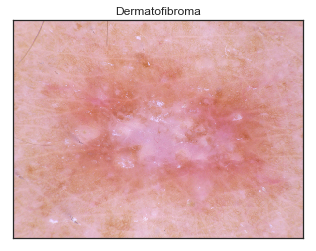

In [3]:
img = mpimg.imread('dataskin/Train/dermatofibroma/ISIC_0025223.jpg')
#this function imshow displays data as an image
imgplot = plt.imshow(img)
#show the picture
plt.title('Dermatofibroma')
# disabling xticks by Setting xticks to an empty list
plt.xticks([]) 
# disabling yticks by setting yticks to an empty list
plt.yticks([]) 
plt.show();

**Pigmented benign keratosis and Seborrheic keratosis**
<br>They are both benign keratosis, in fact most of the times they are classified together.
A seborrheic keratosis is a common noncancerous (benign) skin growth. People tend to get more of them as they get older.

Seborrheic keratoses are usually brown, black or light tan. The growths (lesions) look waxy or scaly and slightly raised. They appear gradually, usually on the face, neck, chest or back.
Seborrheic keratoses are harmless and not contagious. 

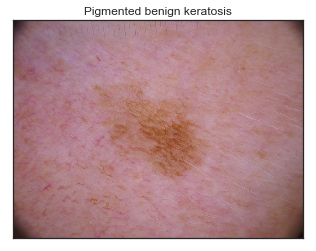

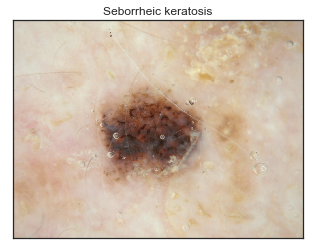

In [4]:
img = mpimg.imread('dataskin/Train/pigmented benign keratosis/ISIC_0024435.jpg')
#this function imshow displays data as an image
imgplot = plt.imshow(img)
#show the picture
plt.title('Pigmented benign keratosis')
# disabling xticks by Setting xticks to an empty list
plt.xticks([]) 
# disabling yticks by setting yticks to an empty list
plt.yticks([]) 
plt.show();
img = mpimg.imread('dataskin/Train/seborrheic keratosis/ISIC_0010810.jpg')
#this function imshow displays data as an image
imgplot = plt.imshow(img)
#show the picture
plt.title('Seborrheic keratosis')
# disabling xticks by Setting xticks to an empty list
plt.xticks([]) 
# disabling yticks by setting yticks to an empty list
plt.yticks([]) 
plt.show();

**Nevus**
<br>Moles (nevi) are a common type of skin growth. They often appear as small, dark brown spots and are caused by clusters of pigment-forming cells (melanocytes). Most people have 10 to 40 moles that appear during childhood and adolescence and may change in appearance or fade over time.

Most moles are harmless. Rarely, they become cancerous. Being aware of changes in your moles and other pigmented patches is important to detecting skin cancer, especially malignant melanoma.

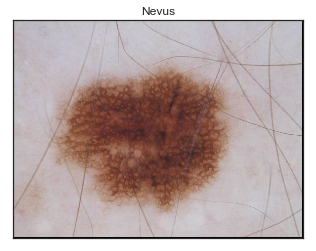

In [5]:
img = mpimg.imread('dataskin/Train/nevus/ISIC_0000019.jpg')
#this function imshow displays data as an image
imgplot = plt.imshow(img)
#show the picture
plt.title('Nevus')
# disabling xticks by Setting xticks to an empty list
plt.xticks([]) 
# disabling yticks by setting yticks to an empty list
plt.yticks([]) 
plt.show();

**Vascular lesion**
<br>Cutaneous vascular lesions are the most common pediatric birthmarks. Flat vascular malformations tend to persist, but raised vascular lesions, known as hemangiomas, generally involute.
Vascular birthmarks are commonly encountered in children and are classified as either hemangiomas or vascular malformations. 
<br>Hemangiomas are benign neoplastic proliferations of vascular endothelial cells characterized by spontaneous involution. In contrast, vascular malformations are not neoplasms but permanent morphogenic abnormalities of capillaries, veins, arteries or lymphatic vessels. <br>Flat lesions (vascular malformations) tend to persist, while raised lesions (hemangiomas) tend to regress.

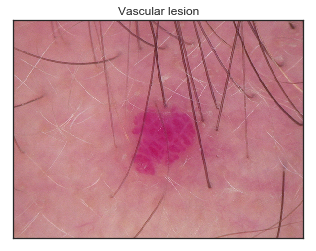

In [6]:
img = mpimg.imread('dataskin/Train/vascular lesion/ISIC_0024475.jpg')
#this function imshow displays data as an image
imgplot = plt.imshow(img)
#show the picture
plt.title('Vascular lesion')
# disabling xticks by Setting xticks to an empty list
plt.xticks([]) 
# disabling yticks by setting yticks to an empty list
plt.yticks([]) 
plt.show();

### Malignant Classes:
**Actinic keratosis**
<br>An actinic keratosis is a rough, scaly patch on the skin that develops from years of sun exposure. It's often found on the face, lips, ears, forearms, scalp, neck or back of the hands.
<br>Actinic keratoses (AKs) are premalignant since they may progress to squamous cell carcinoma. They are a common skin condition and develop in sun-exposed skin of individuals with cumulative sun exposure.
<br>Also known as a solar keratosis, an actinic keratosis grows slowly and usually first appears in people over 40.
<br>Left untreated, the risk of actinic keratoses turning into a type of skin cancer called squamous cell carcinoma is about 5% to 10%. 

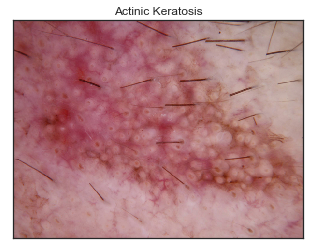

In [7]:
img = mpimg.imread('dataskin/Train/actinic keratosis/ISIC_0025780.jpg')
#this function imshow displays data as an image
imgplot = plt.imshow(img)
#show the picture
plt.title('Actinic Keratosis')
# disabling xticks by Setting xticks to an empty list
plt.xticks([]) 
# disabling yticks by setting yticks to an empty list
plt.yticks([]) 
plt.show();

**Basal cell carcinoma**
<br>Basal cell carcinoma is a type of skin cancer. Basal cell carcinoma begins in the basal cells — a type of cell within the skin that produces new skin cells as old ones die off.

Basal cell carcinoma often appears as a slightly transparent bump on the skin, though it can take other forms. Basal cell carcinoma occurs most often on areas of the skin that are exposed to the sun, such as your head and neck.

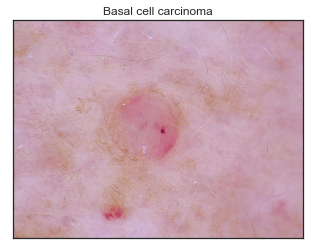

In [8]:
img = mpimg.imread('dataskin/Train/basal cell carcinoma/ISIC_0024572.jpg')
#this function imshow displays data as an image
imgplot = plt.imshow(img)
#show the picture
plt.title('Basal cell carcinoma')
# disabling xticks by Setting xticks to an empty list
plt.xticks([]) 
# disabling yticks by setting yticks to an empty list
plt.yticks([]) 
plt.show();

**Melanoma**
<br>Melanoma, the most serious type of skin cancer, develops in the cells (melanocytes) that produce melanin — the pigment that gives your skin its color. Melanoma can also form in your eyes and, rarely, inside your body, such as in your nose or throat.

The exact cause of all melanomas isn't clear, but exposure to ultraviolet (UV) radiation from sunlight or tanning lamps and beds increases your risk of developing melanoma.
<br>The risk of melanoma seems to be increasing in people under 40, especially women. Knowing the warning signs of skin cancer can help ensure that cancerous changes are detected and treated before the cancer has spread. Melanoma can be treated successfully if it is detected early.

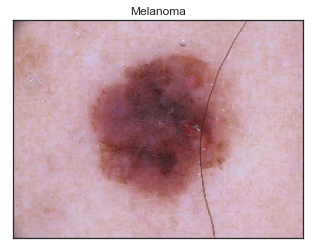

In [9]:
img = mpimg.imread('dataskin/Train/melanoma/ISIC_0000139.jpg')
#this function imshow displays data as an image
imgplot = plt.imshow(img)
#show the picture
plt.title('Melanoma')
# disabling xticks by Setting xticks to an empty list
plt.xticks([]) 
# disabling yticks by setting yticks to an empty list
plt.yticks([]) 
plt.show();

**Squamous cell carcinoma**
<br>Squamous cell carcinoma of the skin is a common form of skin cancer that develops in the squamous cells that make up the middle and outer layers of the skin.

Squamous cell carcinoma of the skin is usually not life-threatening, though it can be aggressive. Untreated, squamous cell carcinoma of the skin can grow large or spread to other parts of your body, causing serious complications.

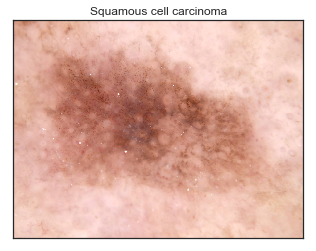

In [10]:
img = mpimg.imread('dataskin/Train/squamous cell carcinoma/ISIC_0024843.jpg')
#this function imshow displays data as an image
imgplot = plt.imshow(img)
#show the picture
plt.title('Squamous cell carcinoma')
# disabling xticks by Setting xticks to an empty list
plt.xticks([]) 
# disabling yticks by setting yticks to an empty list
plt.yticks([]) 
plt.show();

All these informations are taken from the [Mayo Clinic Website](https://www.mayoclinic.org/.) the [National Canter of Biotechonology Website](https://www.ncbi.nlm.nih.gov/) and the [American Family Physician Website](https://www.aafp.org/).

### From the Data Science point of view:

The images are expressed as matrices in which each value represent the pixel value, and specifically each image is comprised of 3 matrices overlapped, one for color Red, one for Green and one for Blue.

In [11]:
train_images_fs

array([[[[158., 136., 148.],
         [160., 137., 157.],
         [160., 138., 161.],
         ...,
         [134., 108., 121.],
         [128., 101., 116.],
         [125.,  99., 112.]],

        [[156., 137., 156.],
         [159., 140., 159.],
         [158., 145., 163.],
         ...,
         [132., 106., 119.],
         [130., 104., 115.],
         [126., 100., 111.]],

        [[159., 141., 157.],
         [159., 142., 160.],
         [162., 145., 164.],
         ...,
         [130., 104., 117.],
         [130., 104., 115.],
         [132., 106., 115.]],

        ...,

        [[175., 151., 164.],
         [168., 144., 157.],
         [164., 140., 153.],
         ...,
         [161., 142., 161.],
         [155., 136., 158.],
         [156., 138., 160.]],

        [[178., 151., 166.],
         [177., 153., 167.],
         [174., 152., 165.],
         ...,
         [155., 144., 161.],
         [156., 144., 164.],
         [156., 145., 162.]],

        [[173., 153., 165.],
       

Previewing one of the images from the train:

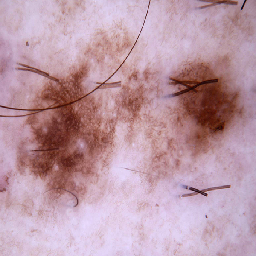

In [12]:
# Preview an image
array_to_img(train_images_fs[0])

Previewing one of the images form the test:

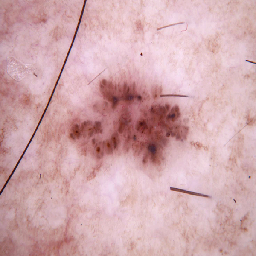

In [13]:
# Preview an image
array_to_img(test_images_fs[0])

In [14]:
train_labels.shape

(2239, 9)

In [15]:
test_labels.shape

(118, 9)

In [16]:
test_images_fs.shape

(118, 256, 256, 3)

In [17]:
train_images_fs.shape

(2239, 256, 256, 3)

In [18]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
type(train_labels)

numpy.ndarray

In [20]:
type(train_images_fs)

numpy.ndarray

In [21]:
dataframe_train=pd.DataFrame(train_labels, columns=['actinic_keratosis', 'basal_cell_carcinoma',\
            'dermatofibroma', 'melanoma', 'nevus', 'pigmented_benign_keratosis',\
            'seborrheic_keratosis', 'squamous_cell_carcinoma', 'vascular_lesion'])

In [22]:
dataframe_train

actinic_keratosis  basal_cell_carcinoma  dermatofibroma  melanoma  \
0                   0.0                   0.0             0.0       0.0   
1                   0.0                   1.0             0.0       0.0   
2                   0.0                   0.0             0.0       0.0   
3                   1.0                   0.0             0.0       0.0   
4                   0.0                   0.0             0.0       0.0   
...                 ...                   ...             ...       ...   
2234                0.0                   0.0             0.0       0.0   
2235                0.0                   0.0             0.0       0.0   
2236                0.0                   0.0             0.0       1.0   
2237                0.0                   0.0             0.0       0.0   
2238                0.0                   0.0             0.0       0.0   

      nevus  pigmented_benign_keratosis  seborrheic_keratosis  \
0       0.0                         1.0                   0.0   
1       0.0                         0.0                   0.0   
2       0.0                         1.0                   0.0   
3       0.0                         0.0                   0.0   
4       0.0                         0.0                   1.0   
...     ...                         ...                   ...   
2234    0.0                         1.0                   0.0   
2235    0.0                         1.0                   0.0   
2236    0.0                         0.0                   0.0   
2237    0.0                         1.0                   0.0   
2238    1.0                         0.0                   0.0   

      squamous_cell_carcinoma  vascular_lesion  
0                         0.0              0.0  
1                         0.0              0.0  
2                         0.0              0.0  
3                         0.0              0.0  
4                         0.0              0.0  
...                       ...              ...  
2234                      0.0              0.0  
2235                      0.0              0.0  
2236                      0.0              0.0  
2237                      0.0              0.0  
2238                      0.0              0.0  

[2239 rows x 9 columns]

train_generator.class_indices 

In [23]:
sums=dataframe_train.sum(axis=0)

In [24]:
sums=pd.DataFrame(sums)

In [25]:
sums

0
actinic_keratosis           114.0
basal_cell_carcinoma        376.0
dermatofibroma               95.0
melanoma                    438.0
nevus                       357.0
pigmented_benign_keratosis  462.0
seborrheic_keratosis         77.0
squamous_cell_carcinoma     181.0
vascular_lesion             139.0

In [26]:
sums['%'] = ((sums[0] / 2239*100).round(2).astype(str) + '%')

In [27]:
sums

0       %
actinic_keratosis           114.0   5.09%
basal_cell_carcinoma        376.0  16.79%
dermatofibroma               95.0   4.24%
melanoma                    438.0  19.56%
nevus                       357.0  15.94%
pigmented_benign_keratosis  462.0  20.63%
seborrheic_keratosis         77.0   3.44%
squamous_cell_carcinoma     181.0   8.08%
vascular_lesion             139.0   6.21%

Showing in a histogram the distribution of the different images in the train set

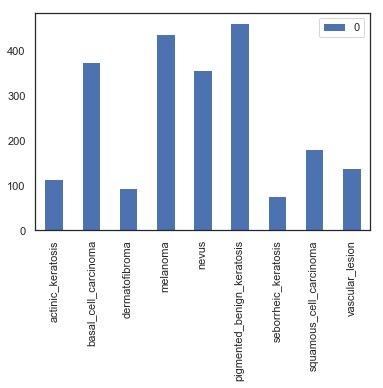

In [28]:
#Change this into seaborn to make it even cooler
sums.plot(kind='bar');

And for the test:

In [29]:
dataframe_test=pd.DataFrame(test_labels, columns=['actinic_keratosis', 'basal_cell_carcinoma',\
            'dermatofibroma', 'melanoma', 'nevus', 'pigmented_benign_keratosis',\
            'seborrheic_keratosis', 'squamous_cell_carcinoma', 'vascular_lesion'])
sums_test=dataframe_test.sum(axis=0)
sums_test=pd.DataFrame(sums_test)

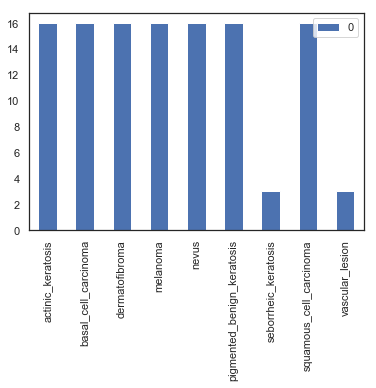

In [30]:
#Change this into seaborn to make it even cooler
sums_test.plot(kind='bar');

In [31]:
sums_test['%'] = ((sums_test[0] / 118*100).round(2).astype(str) + '%')

In [32]:
sums_test

0       %
actinic_keratosis           16.0  13.56%
basal_cell_carcinoma        16.0  13.56%
dermatofibroma              16.0  13.56%
melanoma                    16.0  13.56%
nevus                       16.0  13.56%
pigmented_benign_keratosis  16.0  13.56%
seborrheic_keratosis         3.0   2.54%
squamous_cell_carcinoma     16.0  13.56%
vascular_lesion              3.0   2.54%

Melanoma is cancer 16
acitinic keartosis is pre cancer 16
basal cell is cancer 16
squamous cell cancer 16


dermatofibroma bening 16
benign keratosis 16
nevus bening 16
seborrheic bening 3 
vascular lesion bening 3

Ok so malignant is 54% and bening is 46%.
Still a good balance between the two classes, I wouldn't mess with that.
BUT it could be a problem because the distribution between the classes is different, this might be what could bring a problem to the model that hasn't "learnt" how to identify specific classes, that are less present in the train and much mor en the test.
Namely acitinic keartosis and dermatofibroma.
List this as a possible cause of lower performance.

## Preprocessing

We are going to reimport our images with a lower resolution, since we want the models to be faster especially since we want to try a lot of them, then finally when we will run the final model and test it on the test we will use our best tuned model, retraining it on the full size images.

In [33]:
# Directory path
train_data_dir = 'dataskin/Train'
test_data_dir = 'dataskin/Test'
#val_data_dir = 'dataset/validation_set'

# Get all the data in the directory data/validation (118 images), and reshape them
test_gen= ImageDataGenerator().flow_from_directory(
        test_data_dir, target_size=(32, 32), batch_size=118)

# Get all the data in the directory data/train (2239 images), and reshape them
train_gen = ImageDataGenerator().flow_from_directory(
        train_data_dir, target_size=(32, 32), batch_size=2239)

# Create the datasets
train_img32, train_lab = next(train_gen)
test_img32, test_lab = next(test_gen)

Found 118 images belonging to 9 classes.
Found 2239 images belonging to 9 classes.


In [34]:
# Explore your dataset again
m_train = train_img32.shape[0]
num_px = train_img32.shape[1]
m_test = test_img32.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("train_images shape: " + str(train_img32.shape))
print ("train_labels shape: " + str(train_lab.shape))
print ("test_images shape: " + str(test_img32.shape))
print ("test_labels shape: " + str(test_lab.shape))

Number of training samples: 2239
Number of testing samples: 118
train_images shape: (2239, 32, 32, 3)
train_labels shape: (2239, 9)
test_images shape: (118, 32, 32, 3)
test_labels shape: (118, 9)


In [35]:
train_y = np.reshape(train_lab[:,0], (2239,1))

Building some functions that will help us visualize and compare the different models:

In [162]:
def visualize_training_results(results):
    history = results.history
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    ax1.plot(history['val_acc'])
    ax1.plot(history['acc'])
    ax1.legend(['val_acc', 'acc'], loc='best')
    ax1.set_title('Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    
    ax2.plot(history['val_loss'])
    ax2.plot(history['loss'])
    ax2.legend(['val_loss', 'loss'], loc='best')
    ax2.set_title('Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')

Creating the empty dataframe where we will store the results:

In [37]:
# create an Empty DataFrame object
df = pd.DataFrame()

Creating two functions to preview the results of our models.
With these functions we will display the evolution of accuracy and loss in our model, during the different epochs.
Below that we will see also the values of accuracy and loss and over time we will build a learning curve, adding the result of each previous model and the current one, to see if our model is improving.
The two different funcitons are plotting this last "lerning curve" as either a line plot or a scatter plot.

In [38]:
def model_results(results, model_name, df):
    visualize_training_results(results)
    df1 = pd.DataFrame({'Name': [model_name],
        'accuracy train': [round(results.history['acc'][-1],5)] ,
        'accuracy validation': [round(results.history['val_acc'][-1],5 )],
        'loss train': [round(results.history['loss'][-1],5)],
        'loss validation': [round(results.history['val_loss'][-1],5)]})
    df=df.append(df1)
    fig = plt.subplots(figsize=(12,6))
    
    plt.subplot(1,2,1)
    x=df['Name']
    y=df['accuracy train']
    plt.plot(x, y, color='r')
    x1=df['Name']
    y1=df['accuracy validation']
    plt.plot(x1, y1, color='g')
    plt.xticks(x, labels=df['Name'], rotation='vertical')
    plt.title('Learning Curve Accuracy')
    plt.legend()
 
    plt.subplot(1,2,2)
    x=df['Name']
    y=df['loss train']
    plt.plot(x, y, color='r')
    x1=df['Name']
    y1=df['loss validation']
    plt.plot(x1, y1, color='g')
    plt.xticks(x, labels=df['Name'], rotation='vertical')
    plt.title('Learning Curve Loss')
    plt.legend()

    plt.show()
    return df

In [39]:
def model_results_scat(results, model_name, df):
    visualize_training_results(results)
    df1 = pd.DataFrame({'Name': [model_name],
       'accuracy train': [round(results.history['acc'][-1],5)] ,
       'accuracy validation': [round(results.history['val_acc'][-1],5 )],
       'loss train': [round(results.history['loss'][-1],5)],
       'loss validation': [round(results.history['val_loss'][-1],5)]})
    df=df.append(df1)
    fig = plt.subplots(figsize=(12,6))
    
    plt.subplot(1,2,1)
    x=df['Name']
    y=df['accuracy train']
    plt.scatter(x, y, color='r')
    x1=df['Name']
    y1=df['accuracy validation']
    plt.scatter(x1, y1, color='g')
    plt.xticks(x, labels=df['Name'], rotation='vertical')
    plt.title('Learning Curve Accuracy')
    plt.legend()
 
    plt.subplot(1,2,2)
    x=df['Name']
    y=df['loss train']
    plt.scatter(x, y, color='r')
    x1=df['Name']
    y1=df['loss validation']
    plt.scatter(x1, y1, color='g')
    plt.xticks(x, labels=df['Name'], rotation='vertical')
    plt.title('Learning Curve Loss')
    plt.legend()

    plt.show()
    return df

We will create later a function to create a model. But since we want our model to be well structured, it doesn't make sense to do so for a naive model, that needs to be instead as skimmed down and simple as possible.

In [40]:
"""And let us create another function to generate models.
With this function we can set all the parameters that we want, input_shape, activation function, loss, optimizer algorithm, metrics etc.
We will also set most of these parameters as default, except for input shape, to make the execution of the function not too heavy."""

'And let us create another function to generate models.\nWith this function we can set all the parameters that we want, input_shape, activation function, loss, optimizer algorithm, metrics etc.\nWe will also set most of these parameters as default, except for input shape, to make the execution of the function not too heavy.'

In [41]:
"""def create_model(input_shape, activation='relu', 
                 loss='sparse_categorical_crossentropy', 
                optimizer='rmsprop',metrics=['acc'],
                 neur1=10, neur2=32, pool=(2,2)):
 # create model
    model = models.Sequential()
    model.add(layers.Conv2D(neur1, (3, 3), activation=activation,
                        input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool))
    
    model.add(layers.Conv2D(neur1, (4, 4), activation=activation))
    model.add(layers.MaxPooling2D(pool))

    model.add(layers.Conv2D(neur2, (3, 3), activation=activation))
    model.add(layers.MaxPooling2D(pool))

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation=activation))
    model.add(layers.Dense(9, activation='softmax'))

# Compile model
    model.compile(loss=loss,
              optimizer=optimizer,
              metrics=metrics)
    return model"""

"def create_model(input_shape, activation='relu', \n                 loss='sparse_categorical_crossentropy', \n                optimizer='rmsprop',metrics=['acc'],\n                 neur1=10, neur2=32, pool=(2,2)):\n # create model\n    model = models.Sequential()\n    model.add(layers.Conv2D(neur1, (3, 3), activation=activation,\n                        input_shape=input_shape))\n    model.add(layers.MaxPooling2D(pool))\n    \n    model.add(layers.Conv2D(neur1, (4, 4), activation=activation))\n    model.add(layers.MaxPooling2D(pool))\n\n    model.add(layers.Conv2D(neur2, (3, 3), activation=activation))\n    model.add(layers.MaxPooling2D(pool))\n\n    model.add(layers.Flatten())\n    model.add(layers.Dense(32, activation=activation))\n    model.add(layers.Dense(9, activation='softmax'))\n\n# Compile model\n    model.compile(loss=loss,\n              optimizer=optimizer,\n              metrics=metrics)\n    return model"

And one more function to fit the model and get the results. Also here we can set number of epochs, batch size and validation split, but there are default parameters too.

In [42]:
def fit_model(model, X, y, epo=15, batch=15, val_split=0.3, verbose=0):
    results = model.fit(X, y, epochs=epo, batch_size=batch, 
                        validation_split=val_split, verbose=verbose)
    return results

In [43]:
#visualize_training_results(history)

### Trying to pick a Naive model

Trying with a simple model:

In [44]:
"""model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation='relu',
                        input_shape=(32 ,32,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])"""

"model = models.Sequential()\nmodel.add(layers.Conv2D(10, (3, 3), activation='relu',\n                        input_shape=(32 ,32,  3)))\nmodel.add(layers.MaxPooling2D((2, 2)))\n\nmodel.add(layers.Flatten())\nmodel.add(layers.Dense(32, activation='relu'))\nmodel.add(layers.Dense(9, activation='softmax'))\n\nmodel.compile(loss='sparse_categorical_crossentropy',\n              optimizer='rmsprop',\n              metrics=['acc'])"

And doing only 10 epochs:

In [45]:
#history1 = fit_model(model, train_img32,train_y)

Let us visualize the results of this first model:
The bottom two graphs will make sense only later on since we are building a learning curve, to compare the different models' performance.

In [46]:
#df=model_results(history1, '32x32 1st model', df)
#df

Another attempt: all the previous parameters but making the last dense layer smaller.

In [47]:
"""model2 = models.Sequential()
model2.add(layers.Conv2D(10, (3, 3), activation='relu',
                        input_shape=(32 ,32,  3)))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Flatten())
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(9, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])"""

"model2 = models.Sequential()\nmodel2.add(layers.Conv2D(10, (3, 3), activation='relu',\n                        input_shape=(32 ,32,  3)))\nmodel2.add(layers.MaxPooling2D((2, 2)))\n\nmodel2.add(layers.Flatten())\nmodel2.add(layers.Dense(10, activation='relu'))\nmodel2.add(layers.Dense(9, activation='softmax'))\n\nmodel2.compile(loss='sparse_categorical_crossentropy',\n              optimizer='rmsprop',\n              metrics=['acc'])"

In [48]:
#history3 = fit_model(model2,train_img32,train_y)

In [49]:
#df=model_results(history3, '32x32 3rd model, < nrns last layer', df)
#df

#### Even less Neurons:

In [50]:
"""model3 = models.Sequential()
model3.add(layers.Conv2D(5, (3, 3), activation='relu',
                        input_shape=(32 ,32,  3)))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Flatten())
model3.add(layers.Dense(5, activation='relu'))
model3.add(layers.Dense(9, activation='softmax'))

model3.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])"""

"model3 = models.Sequential()\nmodel3.add(layers.Conv2D(5, (3, 3), activation='relu',\n                        input_shape=(32 ,32,  3)))\nmodel3.add(layers.MaxPooling2D((2, 2)))\n\nmodel3.add(layers.Flatten())\nmodel3.add(layers.Dense(5, activation='relu'))\nmodel3.add(layers.Dense(9, activation='softmax'))\n\nmodel3.compile(loss='sparse_categorical_crossentropy',\n              optimizer='rmsprop',\n              metrics=['acc'])"

In [51]:
#history4 = fit_model(model3, train_img32,
#                    train_y)

In [52]:
#df=model_results(history4, '32x32 4th model, < neurons', df)
#df

#### Less resolution images.

In [53]:
# Directory path
train_data_dir = 'dataskin/Train'
#test_data_dir = 'dataskin/Test'

# Get all the data in the directory data/validation (118 images), and reshape them
#test_gen= ImageDataGenerator().flow_from_directory(
#        test_data_dir, target_size=(8, 8), batch_size=118)

# Get all the data in the directory data/train (2239 images), and reshape them
train_gen = ImageDataGenerator().flow_from_directory(
        train_data_dir, target_size=(8, 8), batch_size=2239)

# Create the datasets
train_img8, train_lab = next(train_gen)
#test_img, test_lab = next(test_gen)

Found 2239 images belonging to 9 classes.


In [54]:
train_img8.shape

(2239, 8, 8, 3)

In [55]:
train_y = np.reshape(train_lab[:,0], (2239,1))
#test_y = np.reshape(test_lab[:,0], (118,1))

In [56]:
model = models.Sequential()
model.add(layers.Conv2D(3, (3, 3), activation='relu',
                        input_shape=(8 ,8,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [57]:
history = fit_model(model, train_img8,
                    train_y, epo=10, batch=10)

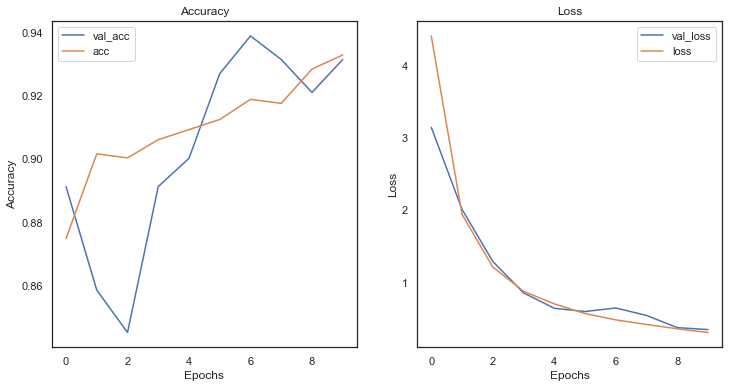

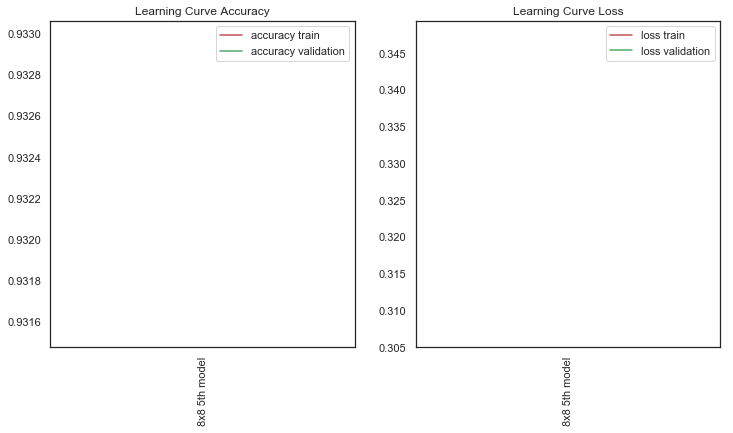

In [58]:
df=model_results(history, '8x8 5th model', df)

The good news is that even if the results change a lot in the first part where I do regualr NN, every time I run the code, they don't change so radically with the CNN.
I will keep track a bit but overall it seems like I can stop worrying about reproducibe results, if I use CNN right away.

## Starting to improve our model:

Taking from the german signs notebook

Nope. It's in AWS Sagemaker. But I can look back at it and use either a simple pipeline for loading and changing the size of the images, or for images augmentation to balance the classes of the different skin anomalies.
<br>A simple pipeline can even be "load, normalize, augment".

#### To improve our model we will take several steps:
   - normalize the data 
   - increase image resolution
   - add more epochs
   - add more layers
   - increase the batch size
   - change activation function and optimization
    
After we have done all this we will select the best performing model and we will also group up into 2 classes, cancerous and benign growth too.
<br>Maybe I should do that now actually.
<br>No I will do it after this first selection so I can say I have a good model to predict which of the 9 classes with this much accuracy.
<br>And then introduce the concept of two classes and decreasing recall.
<br>After that anyhow, do another round of tuning for the model, this time using:
 - drop out layers
 - regularization
 - normalization
 - data augmentation
 - balancing classes with data augmentation
 

### Improving the model with 9 classes:

Restart with an empty dataframe because while before we were looking for the lowest performance model now we are looking to improve it.

In [59]:
df = pd.DataFrame()

Let us start by visualizing again the results from what we picked to be our naive model:

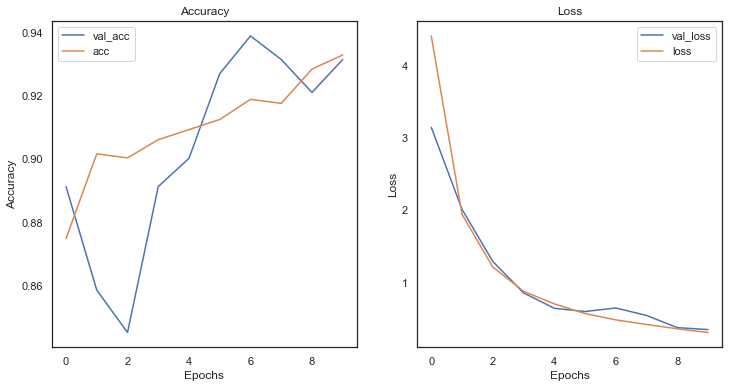

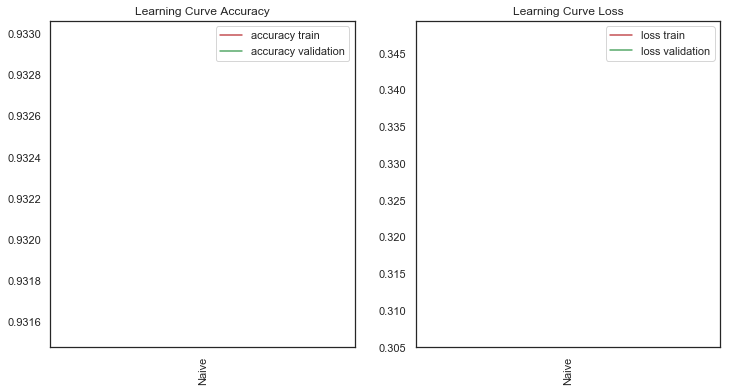

Name  accuracy train  accuracy validation  loss train  loss validation
0  Naive         0.93299              0.93155     0.30707          0.34739

In [60]:
df=model_results(history, 'Naive', df)
df

#### Normalize the data:

In [61]:
train_img8[0][1]

array([[177., 131., 131.],
       [190., 146., 143.],
       [208., 178., 190.],
       [191., 149., 151.],
       [179., 131., 121.],
       [198., 171., 180.],
       [176., 135., 131.],
       [165., 123., 124.]], dtype=float32)

As we can see the RGB values of each pixel are not scaled, we are going to scale their value between 0 and 1 by dividing each pixel value by 225.
To standardize the pixel values:

In [62]:
train_img8 /= 255.

In [63]:
train_img8[0][1]

array([[0.69411767, 0.5137255 , 0.5137255 ],
       [0.74509805, 0.57254905, 0.56078434],
       [0.8156863 , 0.69803923, 0.74509805],
       [0.7490196 , 0.58431375, 0.5921569 ],
       [0.7019608 , 0.5137255 , 0.4745098 ],
       [0.7764706 , 0.67058825, 0.7058824 ],
       [0.6901961 , 0.5294118 , 0.5137255 ],
       [0.64705884, 0.48235294, 0.4862745 ]], dtype=float32)

In [64]:
history52 = fit_model(model, train_img8,train_y)

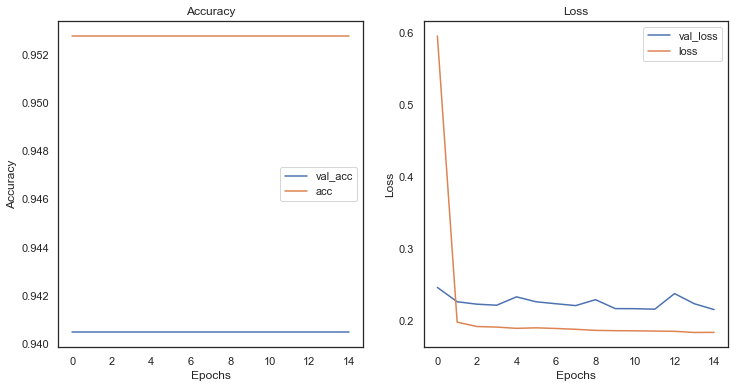

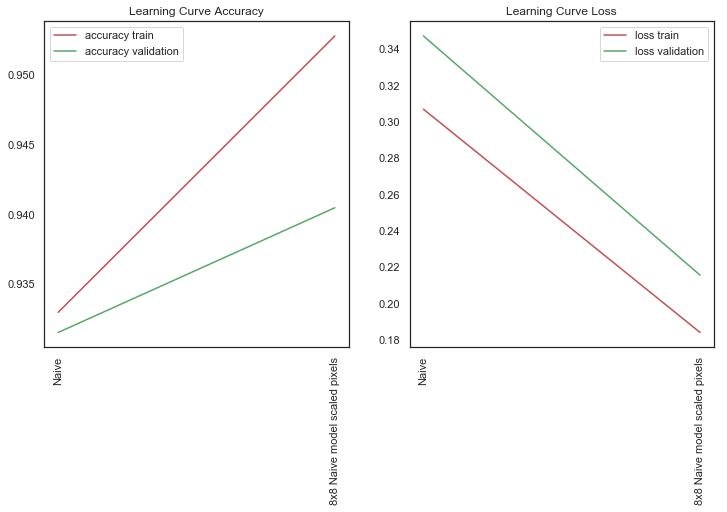

Name  accuracy train  accuracy validation  \
0                          Naive         0.93299              0.93155   
0  8x8 Naive model scaled pixels         0.95278              0.94048   

   loss train  loss validation  
0     0.30707          0.34739  
0     0.18411          0.21566

In [65]:
df=model_results(history52, '8x8 Naive model scaled pixels', df)
df

#### Adding more layers:

Let us move on from the basic naive model to a more structured one with more layers.
We will define it with a function that will allow us to also tweak other parameters, which is what we will do to keep tuning our model.
With this function we can set all the parameters that we want, input_shape, activation function, loss, optimizer algorithm, metrics etc.
We will also set most of these parameters as default, except for input shape, to make the execution of the function not too heavy.

In [66]:
def create_model(input_shape=(64, 64, 3), activation='relu', 
                 loss='sparse_categorical_crossentropy', 
                optimizer='rmsprop',metrics=['acc'] , 
                 neur1=10, neur2=20, pool=(2,2)):
 # create model
    model = models.Sequential()
    model.add(layers.Conv2D(neur1, (3, 3), activation=activation,
                        input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool))
    
    model.add(layers.Conv2D(neur1, (4, 4), activation=activation))
    model.add(layers.MaxPooling2D(pool))

    model.add(layers.Conv2D(neur2, (3, 3), activation=activation))
    model.add(layers.MaxPooling2D(pool))

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation=activation))
    model.add(layers.Dense(9, activation='softmax'))

# Compile model
    model.compile(loss=loss,
              optimizer=optimizer,
              metrics=metrics)
    return model

In [67]:
model_a=create_model(input_shape=(32,32,3))

In [68]:
history1 = fit_model(model_a, train_img32,train_y)

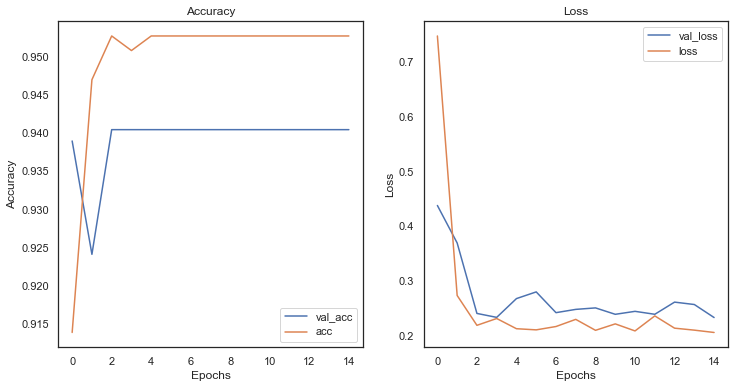

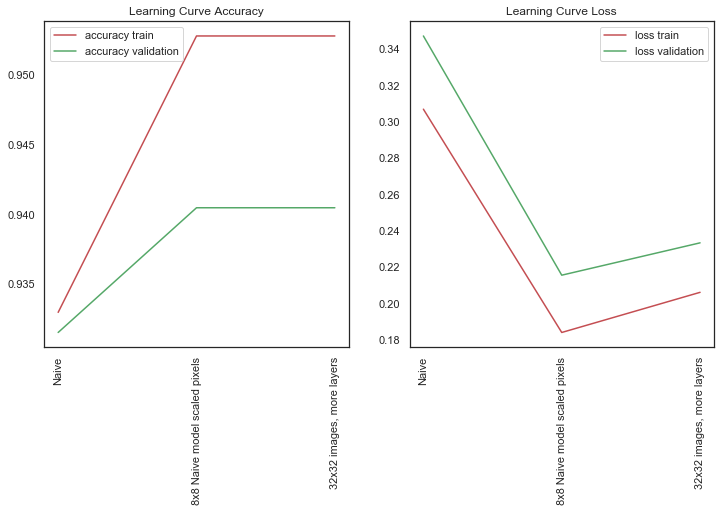

Name  accuracy train  accuracy validation  \
0                          Naive         0.93299              0.93155   
0  8x8 Naive model scaled pixels         0.95278              0.94048   
0      32x32 images, more layers         0.95278              0.94048   

   loss train  loss validation  
0     0.30707          0.34739  
0     0.18411          0.21566  
0     0.20622          0.23347

In [69]:
df=model_results(history1, '32x32 images, more layers', df)
df

#### Increasing Image resolution:
Importing images with 64x64 image resolution.

In [70]:
# Directory path
train_data_dir = 'dataskin/Train'
test_data_dir = 'dataskin/Test'

# Get all the data in the directory data/train (2239 images), and reshape them
train_gen = ImageDataGenerator().flow_from_directory(
        train_data_dir, target_size=(64, 64), batch_size=2239)

# Get all the data in the directory data/validation (118 images), and reshape them
test_gen= ImageDataGenerator().flow_from_directory(
        test_data_dir, target_size=(64, 64), batch_size=118)

# Create the datasets
train_img64, train_lab = next(train_gen)
test_img64, test_lab = next(test_gen)

#normalizing again
train_img64 /= 255.
test_img64 /= 255.

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [71]:
train_y = np.reshape(train_lab[:,0], (2239,1))
test_y = np.reshape(test_lab[:,0], (118,1))

In [72]:
# No need to specify input shape, since the default is 64x64
model_b=create_model()

In [73]:
history2 = fit_model(model_b, train_img64, train_y)

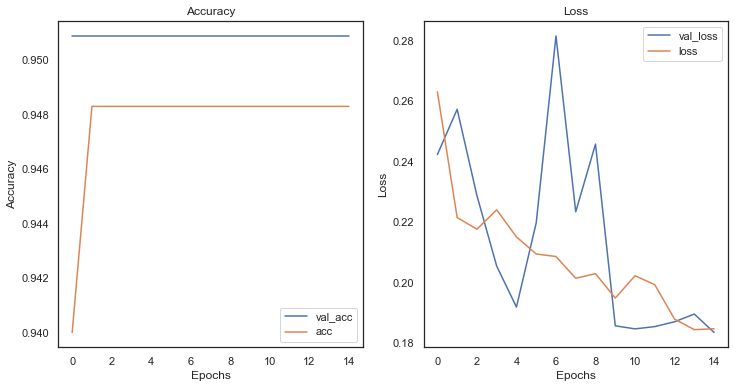

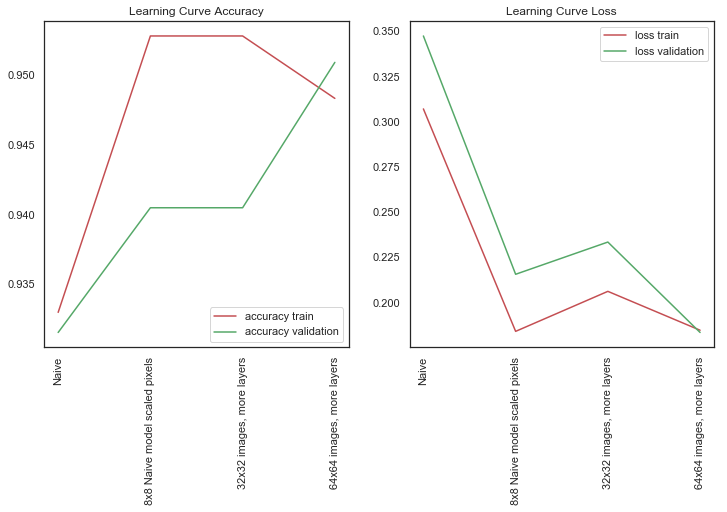

Name  accuracy train  accuracy validation  \
0                          Naive         0.93299              0.93155   
0  8x8 Naive model scaled pixels         0.95278              0.94048   
0      32x32 images, more layers         0.95278              0.94048   
0      64x64 images, more layers         0.94831              0.95089   

   loss train  loss validation  
0     0.30707          0.34739  
0     0.18411          0.21566  
0     0.20622          0.23347  
0     0.18473          0.18349

In [74]:
df=model_results(history2, '64x64 images, more layers', df)
df

We tried also importing the images in their full size, and training the model on those but there was no substantial improvement in the performance, therefore we decided it was not worth the extra long computational time, and we did not include it.

#### Increasing number of epochs:
Keeping the same model, but we will do it with images sizes 64 to reduce running time.

In [75]:
history4=fit_model(model_b, train_img64, train_y, epo=30)

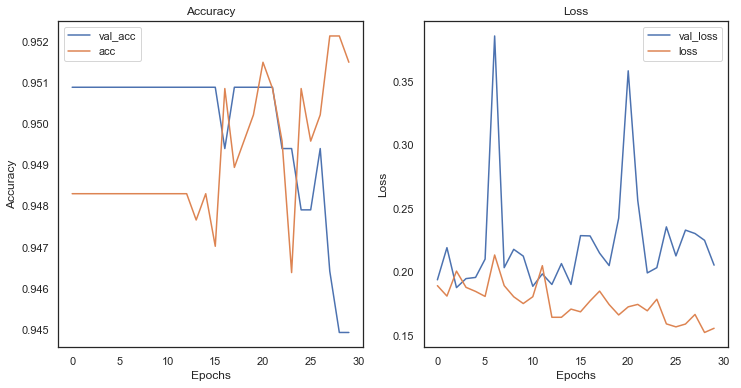

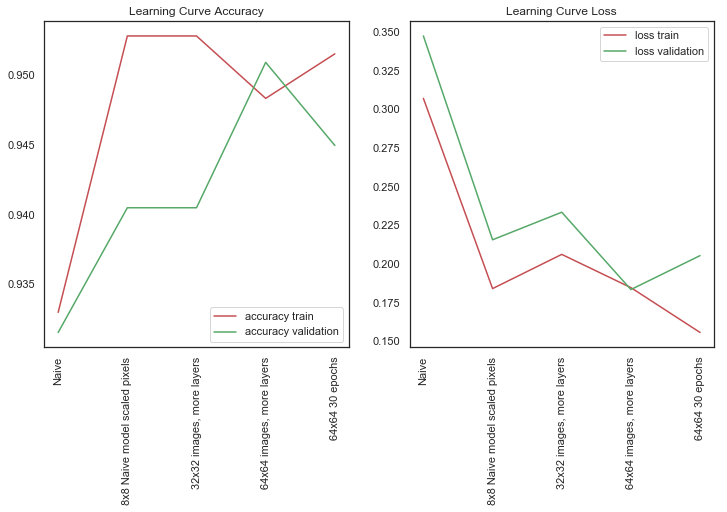

Name  accuracy train  accuracy validation  \
0                          Naive         0.93299              0.93155   
0  8x8 Naive model scaled pixels         0.95278              0.94048   
0      32x32 images, more layers         0.95278              0.94048   
0      64x64 images, more layers         0.94831              0.95089   
0                64x64 30 epochs         0.95150              0.94494   

   loss train  loss validation  
0     0.30707          0.34739  
0     0.18411          0.21566  
0     0.20622          0.23347  
0     0.18473          0.18349  
0     0.15575          0.20544

In [76]:
df=model_results(history4, '64x64 30 epochs', df)
df

#### Increase the batch size: 50

In [77]:
history5=fit_model(model_b, train_img64, train_y, epo=30, batch=50)

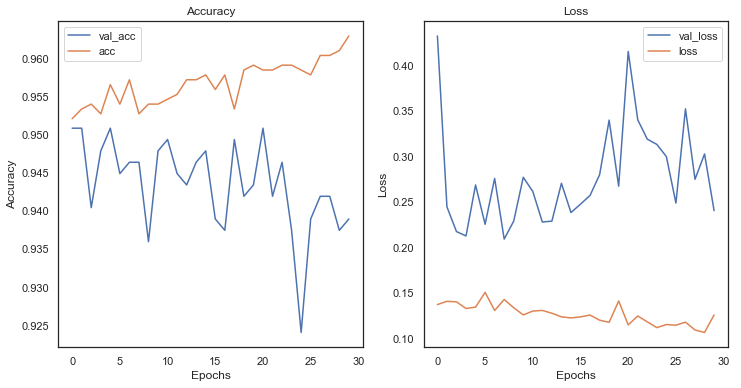

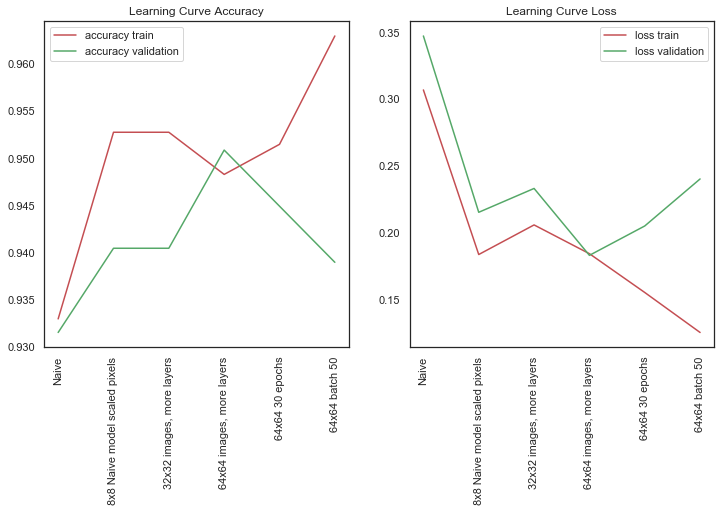

Name  accuracy train  accuracy validation  \
0                          Naive         0.93299              0.93155   
0  8x8 Naive model scaled pixels         0.95278              0.94048   
0      32x32 images, more layers         0.95278              0.94048   
0      64x64 images, more layers         0.94831              0.95089   
0                64x64 30 epochs         0.95150              0.94494   
0                 64x64 batch 50         0.96299              0.93899   

   loss train  loss validation  
0     0.30707          0.34739  
0     0.18411          0.21566  
0     0.20622          0.23347  
0     0.18473          0.18349  
0     0.15575          0.20544  
0     0.12587          0.24057

In [78]:
df=model_results(history5, '64x64 batch 50', df)
df

The truth is that just getting one result for each of these attempts doesn't really tell us too much about the improvement or not of our model, because of the randomness of the results.
What would be more appropriate is for each change we do (in the size of the images, the number of epochs, the batch size) to try a few different values to be able to really get a sense of in which direction our model is moving with that change.
This would be very time consuming to do by hand, so the next step we are goign to take is building a grid search for these parameteres to get a better answer in terms of which ones are the optimal charateristic of our model, which gives us the best accuracy in determining the classification of the skin anomaly.

### Grid Search batch size and epochs:

Grid search is a model hyperparameter optimization technique.
In scikit learn this is a class, and when running a search with this class, we must input a dictionary of hyperparameters to evaluate in the param_grid argument. 
This dictionary contains the model parameter name and an array of values to try.

The GridSearchCV essentially builds and then evaluates one model for each combination of parameters. 
To evaluate each individual model, a 3-fold cross validation is used.

Once we  find out from the GridSearch what are the best parameteres we can use those (running just one single model) with higher resolution images.

Since GridSearch takes a long time to run, for this one and also the following ones we included the code but commented it out, saving the parameteres that were identified by the search (see below) so that the search doesn't need to be re run every time.

In [79]:
"""
# Use scikit-learn to grid search the batch size and epochs
# fix random seed for reproducibility
seed = 42
tf.random.set_seed(seed)

#set X and Y
X=train_img64
Y=train_y
# create model
model = KerasClassifier(model=create_model())
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
"""
#code from Jason Brownlee on https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

'\n# Use scikit-learn to grid search the batch size and epochs\n# fix random seed for reproducibility\nseed = 42\ntf.random.set_seed(seed)\n\n#set X and Y\nX=train_img64\nY=train_y\n# create model\nmodel = KerasClassifier(model=create_model())\n# define the grid search parameters\nbatch_size = [10, 20, 40, 60, 80, 100]\nepochs = [10, 50, 100]\nparam_grid = dict(batch_size=batch_size, epochs=epochs)\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)\ngrid_result = grid.fit(X, Y)\n'

In [80]:
"""
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    """

'\n# summarize results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))\n    '

At least these results are not all the same for the different epochs and batches. They are all different the best one is really 10 and 10

In [81]:
#best_params=grid_result.best_params_
#best_params

In [82]:
#best_batch=best_params['batch_size']

In [83]:
best_batch=10

In [84]:
#best_epochs=best_params['epochs']

In [85]:
best_epochs=10

Now we can run again a model with the higher resolution images, using the best parameters we obtained from the grid search.

In [86]:
history6 = fit_model(model_b, train_img64, train_y,
                    epo=best_epochs,
                    batch=best_batch)

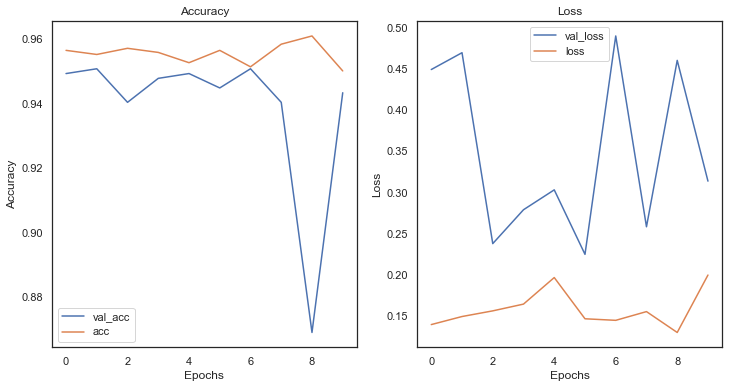

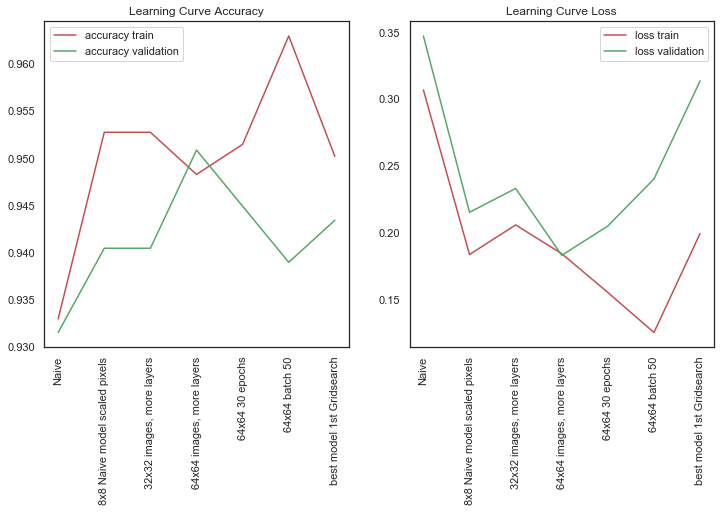

Name  accuracy train  accuracy validation  \
0                          Naive         0.93299              0.93155   
0  8x8 Naive model scaled pixels         0.95278              0.94048   
0      32x32 images, more layers         0.95278              0.94048   
0      64x64 images, more layers         0.94831              0.95089   
0                64x64 30 epochs         0.95150              0.94494   
0                 64x64 batch 50         0.96299              0.93899   
0      best model 1st Gridsearch         0.95022              0.94345   

   loss train  loss validation  
0     0.30707          0.34739  
0     0.18411          0.21566  
0     0.20622          0.23347  
0     0.18473          0.18349  
0     0.15575          0.20544  
0     0.12587          0.24057  
0     0.19984          0.31382

In [87]:
df=model_results(history6, 'best model 1st Gridsearch', df)
df

### Grid Search Optimization Algorithm:

We can run again a GridSearch, but this time instead of trying different numbers of epochs and batch sizes, we will try different optimization algorithms. Here is a lists of them, and as we can see from the number of options, GridSearch is a good idea to shorten the time in trying all the different possible combinations:

- 'SGD'
- 'RMSprop'
- 'Adagrad'
- 'Adadelta'
- 'Adam' 
- 'Adamax' 
- 'Nadam'

> two words here on SGD and Adam

We already have the function to create the model, and the X and Y we set before are the same. We just need to change the grid for the search of the parameters.

In [88]:
"""
# create model
model = KerasClassifier(model=create_model(), 
                        loss="sparse_categorical_crossentropy", 
                        epochs=best_epochs, batch_size=best_batch)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
"""
#code from Jason Brownlee on https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/


'\n# create model\nmodel = KerasClassifier(model=create_model(), \n                        loss="sparse_categorical_crossentropy", \n                        epochs=best_epochs, batch_size=best_batch)\n# define the grid search parameters\noptimizer = [\'SGD\', \'RMSprop\', \'Adagrad\', \'Adadelta\', \'Adam\', \'Adamax\', \'Nadam\']\nparam_grid = dict(optimizer=optimizer)\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)\ngrid_result = grid.fit(X, Y)\n'

In [89]:
"""
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
"""

'\n# summarize results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))\n'

In [90]:
#best_params=grid_result.best_params_
#best_params

In [91]:
#best_opti=best_params['optimizer']
#best_opti

In [92]:
### Just for now let me add this so we don't have to redo the search
best_opti='sgd'

Creating a new model with the selected optimizer algorithm:

In [93]:
model_d=create_model(optimizer=best_opti)

In [94]:
history7 = fit_model(model_d, train_img64, train_y,
                    epo=best_epochs,
                    batch=best_batch)

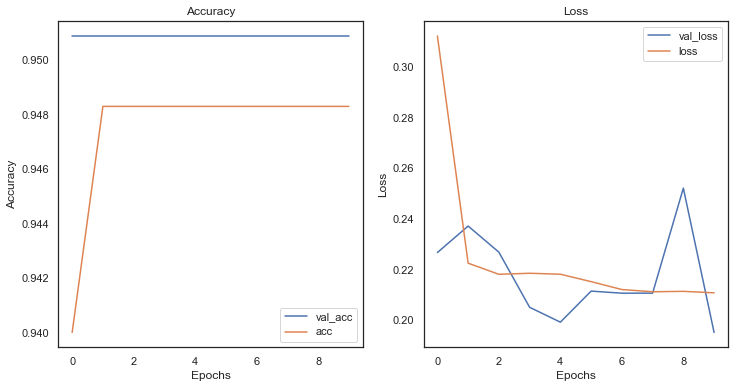

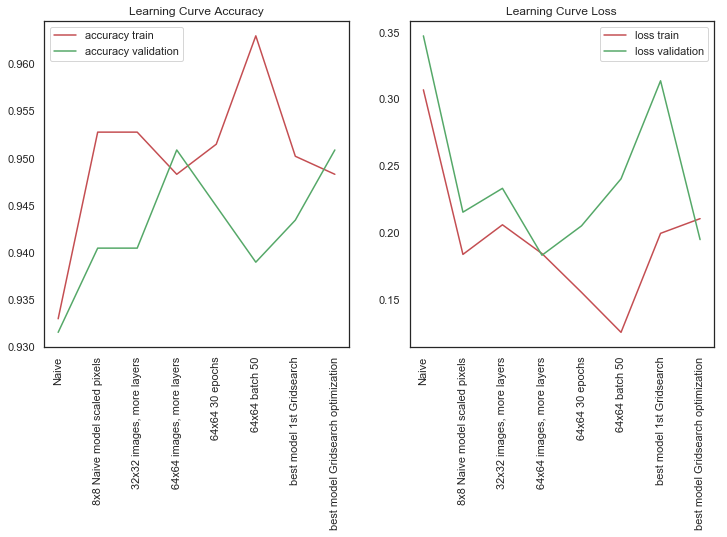

Name  accuracy train  accuracy validation  \
0                               Naive         0.93299              0.93155   
0       8x8 Naive model scaled pixels         0.95278              0.94048   
0           32x32 images, more layers         0.95278              0.94048   
0           64x64 images, more layers         0.94831              0.95089   
0                     64x64 30 epochs         0.95150              0.94494   
0                      64x64 batch 50         0.96299              0.93899   
0           best model 1st Gridsearch         0.95022              0.94345   
0  best model Gridsearch optimization         0.94831              0.95089   

   loss train  loss validation  
0     0.30707          0.34739  
0     0.18411          0.21566  
0     0.20622          0.23347  
0     0.18473          0.18349  
0     0.15575          0.20544  
0     0.12587          0.24057  
0     0.19984          0.31382  
0     0.21082          0.19516

In [95]:
df=model_results(history7, 'best model Gridsearch optimization', df)
df

### Grid Search Learning Rate and Momentum

In [96]:
"""
# fix random seed for reproducibility
seed = 42
tf.random.set_seed(seed)

#set X and Y
X=train_img64
Y=train_y
"""

'\n# fix random seed for reproducibility\nseed = 42\ntf.random.set_seed(seed)\n\n#set X and Y\nX=train_img64\nY=train_y\n'

In [97]:
"""
# create model
model = KerasClassifier(model=create_model, loss="sparse_categorical_crossentropy", 
                        optimizer="SGD", epochs=20, batch_size=20, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(optimizer__learning_rate=learn_rate, optimizer__momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
"""

'\n# create model\nmodel = KerasClassifier(model=create_model, loss="sparse_categorical_crossentropy", \n                        optimizer="SGD", epochs=20, batch_size=20, verbose=0)\n# define the grid search parameters\nlearn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]\nmomentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]\nparam_grid = dict(optimizer__learning_rate=learn_rate, optimizer__momentum=momentum)\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)\ngrid_result = grid.fit(X, Y)\n'

In [98]:
"""
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    """

'\n# summarize results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))\n    '

Let us print out just the best lesarning rate and momentum:

In [99]:
#best_params=grid_result.best_params_
#best_params

In [100]:
#best_rate=best_params['optimizer__learning_rate']
#best_rate

In [101]:
best_rate=0.001

In [102]:
#best_momentum=best_params['optimizer__momentum']
               

In [103]:
best_momentum=0.9

In [104]:
optimizer = tf.keras.optimizers.SGD(learning_rate=best_rate, 
                                    momentum=best_momentum)

In [105]:
model_e=create_model(optimizer=optimizer)

In [106]:
history8= fit_model(model_e, train_img64, train_y,
                     epo=best_epochs,batch=best_batch)

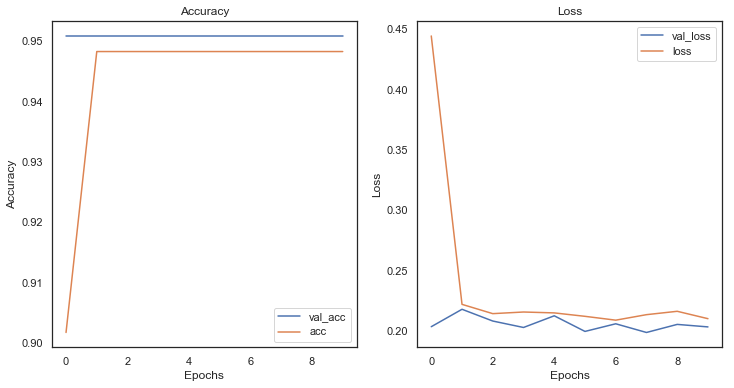

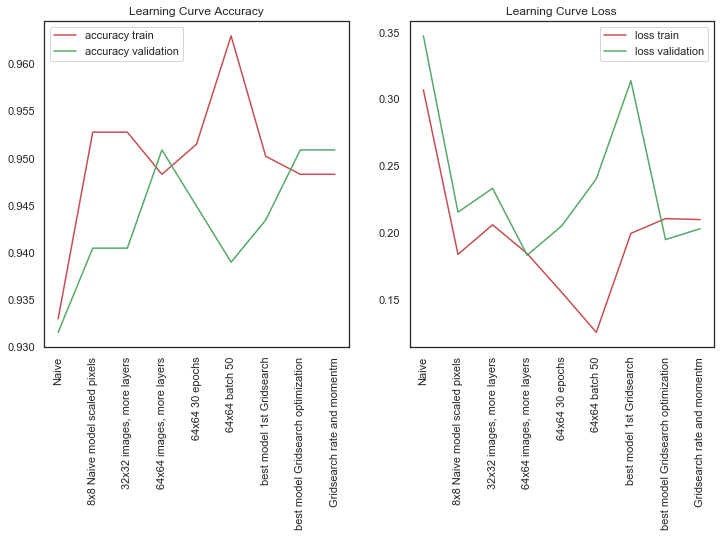

Name  accuracy train  accuracy validation  \
0                               Naive         0.93299              0.93155   
0       8x8 Naive model scaled pixels         0.95278              0.94048   
0           32x32 images, more layers         0.95278              0.94048   
0           64x64 images, more layers         0.94831              0.95089   
0                     64x64 30 epochs         0.95150              0.94494   
0                      64x64 batch 50         0.96299              0.93899   
0           best model 1st Gridsearch         0.95022              0.94345   
0  best model Gridsearch optimization         0.94831              0.95089   
0         Gridsearch rate and momentm         0.94831              0.95089   

   loss train  loss validation  
0     0.30707          0.34739  
0     0.18411          0.21566  
0     0.20622          0.23347  
0     0.18473          0.18349  
0     0.15575          0.20544  
0     0.12587          0.24057  
0     0.19984          0.31382  
0     0.21082          0.19516  
0     0.21011          0.20330

In [107]:
df=model_results(history8, 'Gridsearch rate and momentm', df)
df

We could also do a grid search to choose the best activation function, but it doesn't make much sense in our multiclass case because the most popular one is softmax for this case, there aren't really that many options. But we will do this type of grid search later when we will reduce our problem to a binary classification problem, and there will be more options of activation fucntions to use at that point.

What we can still tune though is the number of neurons in the hidden layers.
We will do this with another grid search.

### How to Tune the Neuron Activation Function

#### Changing activation functions and optimizations:
Some of the options for activation functions are:
- relu
- swish
- softmax
- leaky relu
- sigmoid

In [108]:
# Function to create model, required for KerasClassifier
def create_model_CV(activation='relu'):
 # create model
    model = models.Sequential()
    model.add(layers.Conv2D(10, (3, 3), activation=activation,
                        input_shape=(64,64,3)))
    model.add(layers.MaxPooling2D(2,2))
    
    model.add(layers.Conv2D(10, (4, 4), activation=activation))
    model.add(layers.MaxPooling2D(2,2))

    model.add(layers.Conv2D(20, (3, 3), activation=activation))
    model.add(layers.MaxPooling2D(2,2))

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation=activation))
    model.add(layers.Dense(9, activation='softmax'))

 # Compile model
    model.compile(loss='sparse_categorical_crossentropy', 
                   optimizer=optimizer, metrics=['accuracy'])
    return model

In [109]:
"""
# create model
model = KerasClassifier(model=create_model_CV, epochs=20, batch_size=20)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 
              'hard_sigmoid', 'linear']
param_grid = dict(model__activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
"""

"\n# create model\nmodel = KerasClassifier(model=create_model_CV, epochs=20, batch_size=20)\n# define the grid search parameters\nactivation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', \n              'hard_sigmoid', 'linear']\nparam_grid = dict(model__activation=activation)\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)\ngrid_result = grid.fit(X, Y)\n"

In [110]:
"""
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    """

'\n# summarize results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))\n    '

Best activation function is:

In [111]:
#best_params=grid_result.best_params_
#best_params

In [112]:
#best_function=best_params['model__activation']
#best_function

In [113]:
best_function='softmax'

In [114]:
model_f=create_model(activation=best_function, optimizer=optimizer)

In [115]:
history9= fit_model(model_f, train_img64, train_y,
                     epo=best_epochs, batch=best_batch)

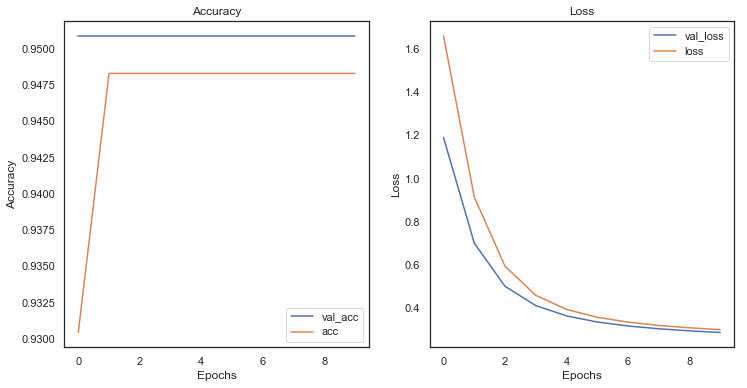

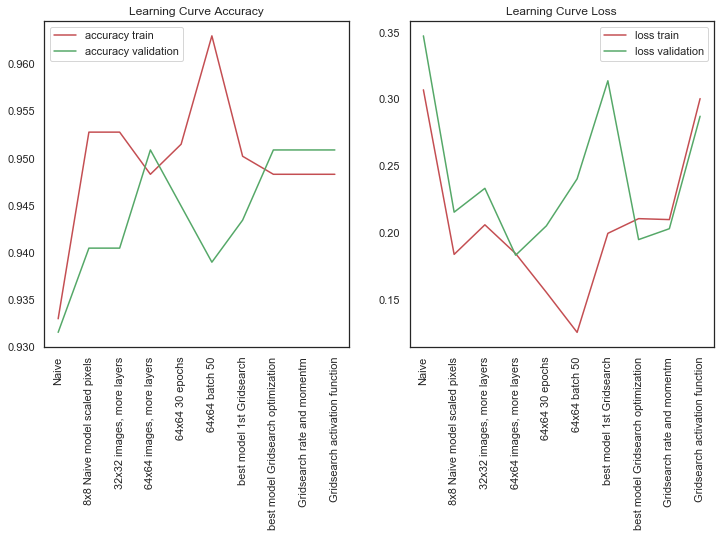

Name  accuracy train  accuracy validation  \
0                               Naive         0.93299              0.93155   
0       8x8 Naive model scaled pixels         0.95278              0.94048   
0           32x32 images, more layers         0.95278              0.94048   
0           64x64 images, more layers         0.94831              0.95089   
0                     64x64 30 epochs         0.95150              0.94494   
0                      64x64 batch 50         0.96299              0.93899   
0           best model 1st Gridsearch         0.95022              0.94345   
0  best model Gridsearch optimization         0.94831              0.95089   
0         Gridsearch rate and momentm         0.94831              0.95089   
0      Gridsearch activation function         0.94831              0.95089   

   loss train  loss validation  
0     0.30707          0.34739  
0     0.18411          0.21566  
0     0.20622          0.23347  
0     0.18473          0.18349  
0     0.15575          0.20544  
0     0.12587          0.24057  
0     0.19984          0.31382  
0     0.21082          0.19516  
0     0.21011          0.20330  
0     0.30050          0.28732

In [116]:
df=model_results(history9, 'Gridsearch activation function', df)
df

### Grid Search number of neurons:

For this grid search we have to slightly modify our `create_model` function, since we are going to search 4 different numbers of neurons for each layer, there's no need to separate between the first 3 layers and the last one.

In [117]:
# Function to create model, required for KerasClassifier
def create_model_neurons(neurons):
 # create model
    model = models.Sequential()
    model.add(layers.Conv2D(neurons, (3, 3), activation='softmax',
                        input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(neurons, (4, 4), activation='softmax'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(neurons, (3, 3), activation='softmax'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(neurons, activation='softmax'))
    model.add(layers.Dense(9, activation='softmax'))

# Compile model
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer=best_opti,
              metrics=['acc'])
    return model

In [118]:
# fix random seed for reproducibility
seed = 42
tf.random.set_seed(seed)
#set X and Y
X=train_img64
Y=train_y

In [119]:
"""
# create model
model = KerasClassifier(model=create_model_neurons, epochs=100, batch_size=50, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(model__neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
#"""
#code from Jason Brownlee on https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

'\n# create model\nmodel = KerasClassifier(model=create_model_neurons, epochs=100, batch_size=50, verbose=0)\n# define the grid search parameters\nneurons = [1, 5, 10, 15, 20, 25, 30]\nparam_grid = dict(model__neurons=neurons)\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)\ngrid_result = grid.fit(X, Y)\n#'

In [120]:
"""
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    """

'\n# summarize results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))\n    '

In [121]:
#results=grid_result.best_params_
#results

In [122]:
#neurons=results['model__neurons']
#neurons

model_neurons 1. Doesn't make sense. But it's also because all the results are the same. We will choose a standard value and pick 10.

In [123]:
best_neurons=10

In [124]:
model_g=create_model(activation=best_function, optimizer=optimizer,
                     neur1=best_neurons)

In [125]:
history10 = fit_model(model_g, train_img64,train_y,
                     epo=best_epochs,batch=best_batch)

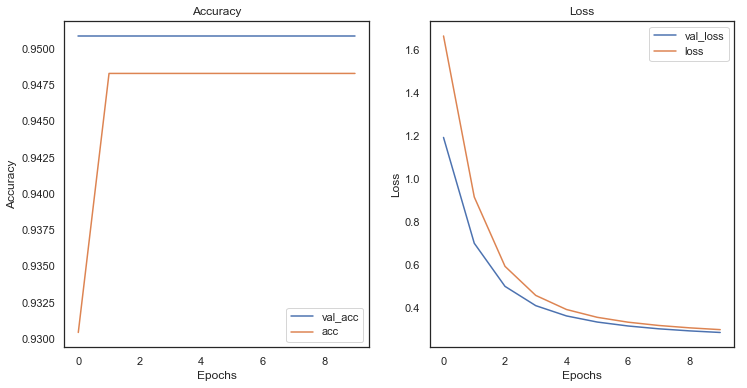

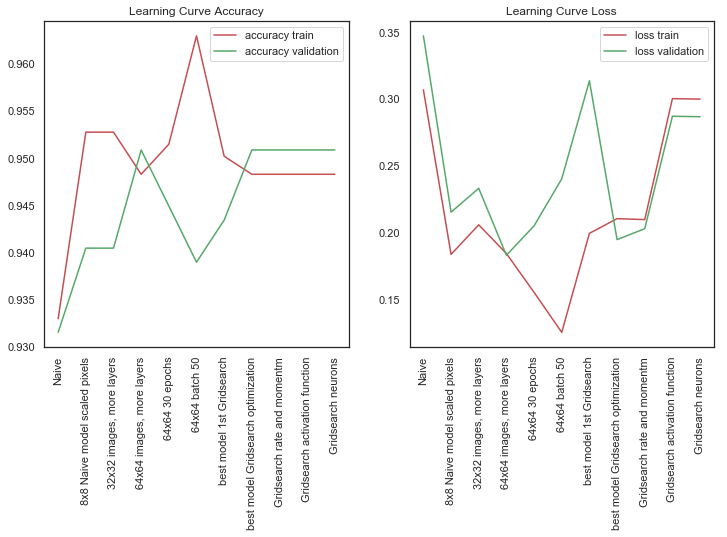

Name  accuracy train  accuracy validation  \
0                               Naive         0.93299              0.93155   
0       8x8 Naive model scaled pixels         0.95278              0.94048   
0           32x32 images, more layers         0.95278              0.94048   
0           64x64 images, more layers         0.94831              0.95089   
0                     64x64 30 epochs         0.95150              0.94494   
0                      64x64 batch 50         0.96299              0.93899   
0           best model 1st Gridsearch         0.95022              0.94345   
0  best model Gridsearch optimization         0.94831              0.95089   
0         Gridsearch rate and momentm         0.94831              0.95089   
0      Gridsearch activation function         0.94831              0.95089   
0                  Gridsearch neurons         0.94831              0.95089   

   loss train  loss validation  
0     0.30707          0.34739  
0     0.18411          0.21566  
0     0.20622          0.23347  
0     0.18473          0.18349  
0     0.15575          0.20544  
0     0.12587          0.24057  
0     0.19984          0.31382  
0     0.21082          0.19516  
0     0.21011          0.20330  
0     0.30050          0.28732  
0     0.30012          0.28696

In [126]:
df=model_results(history10, 'Gridsearch neurons', df)
df

## Tuning

Now that we selected all the best parameters for our model, there is some more tuning that we can do in particular to make sure that our model will not overfit the data.
This is achieved with regularization, dropout layers and early stopping.

### Regularization

Regularization is commonly used when the model is overfitting the data.
The main idea of regularization therefore is to penalize in some way a model that is too complex, that will tend to overfit the data.
L1 regularization just adds one parameter, is not commonly used in Neural Networks.
L2 on the other hand, also called "weigth decay", makes the weights smaller, penalizing especially the largest weights, in a way forcing the model to be simplified.

In [127]:
model_h = models.Sequential()
model_h.add(layers.Conv2D(10, (3, 3), activation='softmax'))
model_h.add(layers.MaxPooling2D((2, 2)))
    
model_h.add(layers.Conv2D(10, (4, 4), activation='softmax'
                         ,kernel_regularizer=regularizers.L2(l2=0.05)))
model_h.add(layers.MaxPooling2D((2, 2)))
model_h.add(layers.Conv2D(10, (3, 3), activation='softmax'
                          ,kernel_regularizer=regularizers.L2(l2=0.05)))
model_h.add(layers.MaxPooling2D((2, 2)))

model_h.add(layers.Flatten())
model_h.add(layers.Dense(32, activation='softmax' 
                       ,kernel_regularizer=regularizers.L2(l2=0.05)))
model_h.add(layers.Dense(9, activation='softmax'))

# Compile model
model_h.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])


In [128]:
history11 = fit_model(model_h, train_img64, train_y,
                    epo=50,
                    batch=best_batch)

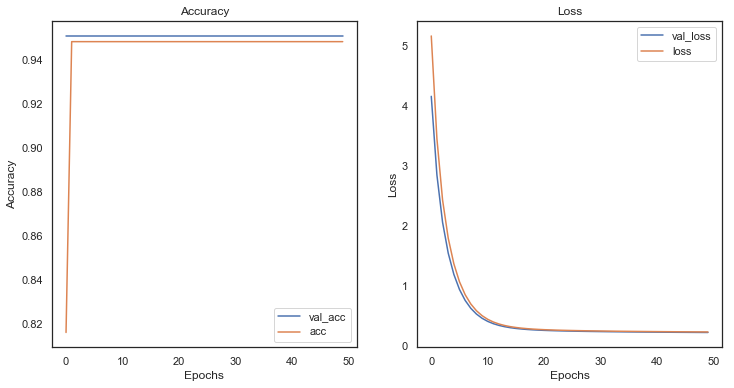

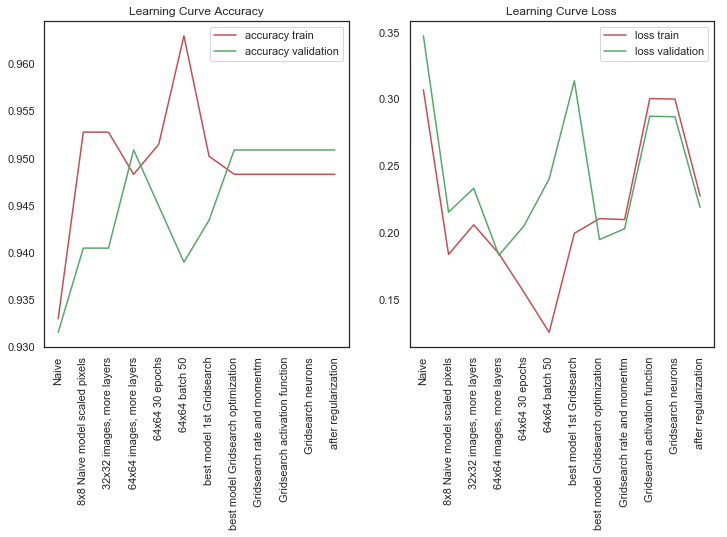

Name  accuracy train  accuracy validation  \
0                               Naive         0.93299              0.93155   
0       8x8 Naive model scaled pixels         0.95278              0.94048   
0           32x32 images, more layers         0.95278              0.94048   
0           64x64 images, more layers         0.94831              0.95089   
0                     64x64 30 epochs         0.95150              0.94494   
0                      64x64 batch 50         0.96299              0.93899   
0           best model 1st Gridsearch         0.95022              0.94345   
0  best model Gridsearch optimization         0.94831              0.95089   
0         Gridsearch rate and momentm         0.94831              0.95089   
0      Gridsearch activation function         0.94831              0.95089   
0                  Gridsearch neurons         0.94831              0.95089   
0                after regularization         0.94831              0.95089   

   loss train  loss validation  
0     0.30707          0.34739  
0     0.18411          0.21566  
0     0.20622          0.23347  
0     0.18473          0.18349  
0     0.15575          0.20544  
0     0.12587          0.24057  
0     0.19984          0.31382  
0     0.21082          0.19516  
0     0.21011          0.20330  
0     0.30050          0.28732  
0     0.30012          0.28696  
0     0.22782          0.21923

In [129]:
df=model_results(history11, 'after regularization', df)
df

We tried also regularization paramteres L2=0.005, L2=0.01, but the best value turned out to be L2=0.05, and we have not included the other ones for brevity.

### Dropout Regularization

Dropout layers, forces the model to block out some nodes, for the model to not rely heavily on certain paths.

In [130]:
# Function to create model, required for KerasClassifier
def create_model_drop(dropout_rate, weight_constraint):

    model = models.Sequential()
    model.add(layers.Conv2D(best_neurons, (3, 3), activation='softmax',
                        input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(best_neurons, (4, 4), activation='softmax',
                         kernel_regularizer=regularizers.L2(l2=0.05), 
                          kernel_constraint=MaxNorm(weight_constraint)))
    model.add(layers.MaxPooling2D((2, 2)))
# Implement dropout to the first hidden layer 
    model.add(layers.Dropout(dropout_rate))
            

    model.add(layers.Conv2D(best_neurons, (3, 3), activation='softmax', 
                        kernel_regularizer=regularizers.L2(l2=0.05), 
                          kernel_constraint=MaxNorm(weight_constraint)))
    model.add(layers.MaxPooling2D((2, 2)))
            
# Implement dropout to the second hidden layer 
    model.add(layers.Dropout(dropout_rate))            

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='softmax', 
                       kernel_regularizer=regularizers.L2(l2=0.05)))
    model.add(layers.Dense(9, activation='softmax'))

# Compile model
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])
    return model

In [131]:
"""
# create model
model = KerasClassifier(model=create_model_drop, epochs=30, batch_size=20)
# define the grid search parameters
weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]
#dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
dropout_rate = [0.0, 0.3, 0.5, 0.7, 0.9]
param_grid = dict(model__dropout_rate=dropout_rate, 
                  model__weight_constraint=weight_constraint)
#param_grid = dict(model__dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
"""

'\n# create model\nmodel = KerasClassifier(model=create_model_drop, epochs=30, batch_size=20)\n# define the grid search parameters\nweight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]\n#dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]\ndropout_rate = [0.0, 0.3, 0.5, 0.7, 0.9]\nparam_grid = dict(model__dropout_rate=dropout_rate, \n                  model__weight_constraint=weight_constraint)\n#param_grid = dict(model__dropout_rate=dropout_rate)\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)\ngrid_result = grid.fit(X, Y)\n'

In [132]:
"""
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    """

'\n# summarize results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))\n    '

In [133]:
#best_params=grid_result.best_params_
#best_params

In [134]:
#best_drop=best_params['model__dropout_rate']
#best_drop

In [135]:
best_drop=0.5

In [136]:
#best_weight_const=best_params['model__weight_constraint']

In [137]:
best_weight_const=3.0

Now that it is clear from the grid search what is the best drop out rate let us create our model with it and see the results in comparison to the other models.

In [138]:
model_i = models.Sequential()
model_i.add(layers.Conv2D(best_neurons, (3, 3), activation='softmax',
                        input_shape=(64, 64, 3)))
model_i.add(layers.MaxPooling2D((2, 2)))
    
model_i.add(layers.Conv2D(best_neurons, (4, 4), activation='softmax',
                         kernel_regularizer=regularizers.L2(l2=0.05), 
                          kernel_constraint=MaxNorm(best_weight_const)))
model_i.add(layers.MaxPooling2D((2, 2)))
# Implement dropout to the first hidden layer 
model_i.add(layers.Dropout(best_drop))
            
model_i.add(layers.Conv2D(best_neurons, (3, 3), activation='softmax', 
                        kernel_regularizer=regularizers.L2(l2=0.05), 
                          kernel_constraint=MaxNorm(best_weight_const)))
model_i.add(layers.MaxPooling2D((2, 2)))
            
# Implement dropout to the second hidden layer 
model_i.add(layers.Dropout(best_drop))            

model_i.add(layers.Flatten())
model_i.add(layers.Dense(32, activation='softmax', 
                       kernel_regularizer=regularizers.L2(l2=0.05)))
model_i.add(layers.Dense(9, activation='softmax'))

# Compile model
model_i.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

# Compile model
model_i.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])
              

In [139]:
history12 = fit_model(model_i, train_img64, train_y,
                    epo=best_epochs,
                    batch=best_batch)

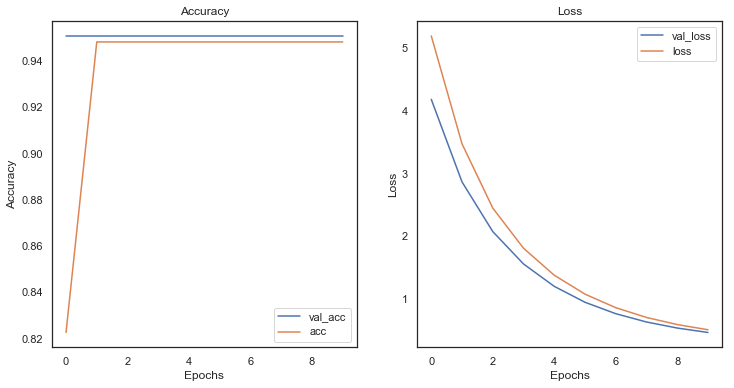

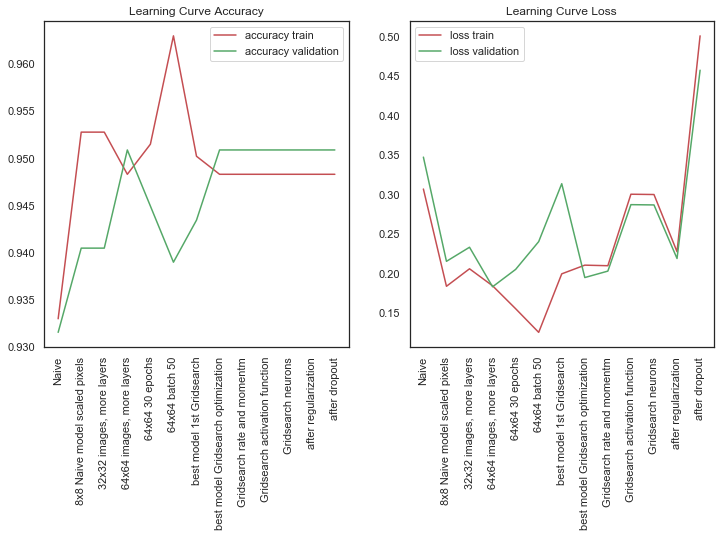

Name  accuracy train  accuracy validation  \
0                               Naive         0.93299              0.93155   
0       8x8 Naive model scaled pixels         0.95278              0.94048   
0           32x32 images, more layers         0.95278              0.94048   
0           64x64 images, more layers         0.94831              0.95089   
0                     64x64 30 epochs         0.95150              0.94494   
0                      64x64 batch 50         0.96299              0.93899   
0           best model 1st Gridsearch         0.95022              0.94345   
0  best model Gridsearch optimization         0.94831              0.95089   
0         Gridsearch rate and momentm         0.94831              0.95089   
0      Gridsearch activation function         0.94831              0.95089   
0                  Gridsearch neurons         0.94831              0.95089   
0                after regularization         0.94831              0.95089   
0                       after dropout         0.94831              0.95089   

   loss train  loss validation  
0     0.30707          0.34739  
0     0.18411          0.21566  
0     0.20622          0.23347  
0     0.18473          0.18349  
0     0.15575          0.20544  
0     0.12587          0.24057  
0     0.19984          0.31382  
0     0.21082          0.19516  
0     0.21011          0.20330  
0     0.30050          0.28732  
0     0.30012          0.28696  
0     0.22782          0.21923  
0     0.50074          0.45729

In [140]:
df=model_results(history12, 'after dropout', df)
df

### Early Stopping

Early stopping: stopping the model from training for the all epochs specified, the model will train for less epochs.
Overfitting neural networks is something you ***want*** to avoid at all costs. However, it's not possible to know in advance how many *epochs* you need to train your model on, and running the model multiple times with varying number of *epochs* maybe helpful, but is a time-consuming process.

We've defined a model with the same architecture as above. This time specify an early stopping point when training the model.

In [141]:
# Define the callbacks
#early_stopping =  [EarlyStopping(monitor='val_loss', patience=10), 
#                   ModelCheckpoint(filepath='best_model.h5', monitor= "val_loss",
#    save_best_only=True)]

In [142]:
#history13 = model_i.fit(train_img64, train_y,
#                epochs=best_epochs,
#                batch_size=best_batch,
#                callbacks=early_stopping, validation_split=0.3)

In [144]:
#df=model_results(history13, 'after early_stopping', df)
#df

#### Best model

This final i model, explain a bit your choice.

#### Evaluate the model:

On the train:

On the test:

In [145]:
test_loss, test_acc= model_i.evaluate(test_img64, test_y)

print('Test Loss:', test_loss, '\nTest Accuracy:', test_acc)

4/4 [==============================] - 0s 20ms/step - loss: 0.7762 - acc: 0.8644
Test Loss: 0.7761826515197754 
Test Accuracy: 0.8644067645072937


#### Doing it again with 256x256 images:

In [ ]:
#normalizing again
train_images_fs /= 255.
test_images_fs /= 255.

In [ ]:
"""
#Creating same model but with input shape 256x256
model_j = models.Sequential()
model_j.add(layers.Conv2D(best_neurons, (3, 3), activation='softmax',
                        input_shape=(256, 256, 3)))
model_j.add(layers.MaxPooling2D((2, 2)))
    
model_j.add(layers.Conv2D(best_neurons, (4, 4), activation='softmax',
                         kernel_regularizer=regularizers.L2(l2=0.05), 
                          kernel_constraint=MaxNorm(best_weight_const)))
model_j.add(layers.MaxPooling2D((2, 2)))
# Implement dropout to the first hidden layer 
model_j.add(layers.Dropout(best_drop))
            
model_j.add(layers.Conv2D(best_neurons, (3, 3), activation='softmax', 
                        kernel_regularizer=regularizers.L2(l2=0.05), 
                          kernel_constraint=MaxNorm(best_weight_const)))
model_j.add(layers.MaxPooling2D((2, 2)))
            
# Implement dropout to the second hidden layer 
model_j.add(layers.Dropout(best_drop))            

model_j.add(layers.Flatten())
model_j.add(layers.Dense(32, activation='softmax', 
                       kernel_regularizer=regularizers.L2(l2=0.05)))
model_j.add(layers.Dense(9, activation='softmax'))

# Compile model
model_j.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])
              """

In [ ]:
# takes a long time!
###model_j.fit(train_images_fs, train_y,  epochs=best_epochs,
###                batch_size=best_batch)
#callbacks=early_stopping) Figure out if you want to include this

In [ ]:
#train_loss, train_acc = model_j.evaluate(train_images_fs, train_y)

#print('Train Loss:', train_loss, '\nTrain Accuracy:', train_acc)

In [ ]:
#test_loss, test_acc= model_j.evaluate(test_images_fs, test_y)

#print('Test Loss:', test_loss, '\nTest Accuracy:', test_acc)

#### Checking a particular image:

In [ ]:
model.predict(test_images[0].reshape(1, 28, 28, 1))

In [ ]:
plt.imshow(test_images[0].reshape(28, 28));

### Visualizing activation layers:

In [ ]:
# Extract model layer outputs
layer_outputs = [layer.output for layer in model.layers[:8]]

# Rather then a model with a single output, we are going to make a model to display the feature maps
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
model.summary()

In [ ]:
# Returns an array for each activation layer
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

# We slice the third channel and preview the results
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

In [ ]:
# Repeating the process for another channel (the 30th)
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

## Changing to two classes cancerous and bening

Next I will work on the data, creating a separate folder 'binary' in which I will store the images divided into 2 classes instead of 9, 'benign' and 'cancerous'.
<br>This folder will still have the same division into train and test that the original data has.
<br>Some of the code below is commented out as we wanted to create the directory and copy the images only once, and not every time that the notebook is compiled, but a user that would want to do the same can uncomment and proceed with the code as is to create the same directories and subfolders.

In [ ]:
acti_dir = 'dataskin/Train/actinic keratosis'
basal_dir = 'dataskin/Train/basal cell carcinoma'
derma_dir = 'dataskin/Train/dermatofibroma'
mela_dir = 'dataskin/Train/melanoma'
nevus_dir = 'dataskin/Train/nevus'
pigm_dir = 'dataskin/Train/pigmented benign keratosis'
sebo_dir = 'dataskin/Train/seborrheic keratosis'
squa_dir = 'dataskin/Train/squamous cell carcinoma'
lesion_dir = 'dataskin/Train/vascular lesion'

new_dir = 'dataskin/binary/'

In [ ]:
imgs_acti = [file for file in os.listdir(acti_dir) if file.endswith('.jpg')]
print('There are', len(imgs_acti), 'images of actinic keratosis')
imgs_basal = [file for file in os.listdir(basal_dir) if file.endswith('.jpg')]
print('There are', len(imgs_basal), 'images of basal cell carcinoma')
imgs_mela = [file for file in os.listdir(mela_dir) if file.endswith('.jpg')]
print('There are', len(imgs_mela), 'images of melanoma')
imgs_squa = [file for file in os.listdir(squa_dir) if file.endswith('.jpg')]
print('There are', len(imgs_squa), 'images of squamous cell carcinoma')

imgs_derma = [file for file in os.listdir(derma_dir) if file.endswith('.jpg')]
print('There are', len(imgs_derma), 'images of dermatofibroma')
imgs_nevus = [file for file in os.listdir(nevus_dir) if file.endswith('.jpg')]
print('There are', len(imgs_nevus), 'images of nevus')
imgs_pigm = [file for file in os.listdir(pigm_dir) if file.endswith('.jpg')]
print('There are', len(imgs_pigm), 'images of pigmented benign keratosis')
imgs_sebo = [file for file in os.listdir(sebo_dir) if file.endswith('.jpg')]
print('There are', len(imgs_sebo), 'images of seborrheic keratosis')
imgs_lesion = [file for file in os.listdir(lesion_dir) if file.endswith('.jpg')]
#print('There are', len(imgs_lesion), 'images of vascula lesion')

In [ ]:
# Code to create the new doler 'binary'
os.mkdir(new_dir)

In [ ]:
""" Code to create paths to subfolders
train_folder = os.path.join(new_dir, 'train')
train_benign = os.path.join(train_folder, 'benign')
train_cancerous = os.path.join(train_folder, 'cancerous')

test_folder = os.path.join(new_dir, 'test')
test_benign = os.path.join(test_folder, 'benign')
test_cancerous = os.path.join(test_folder, 'cancerous')
"""

In [ ]:
""" Code to create subfolders

os.mkdir(train_folder)
os.mkdir(train_benign)
os.mkdir(train_cancerous)

os.mkdir(test_folder)
os.mkdir(test_benign)
os.mkdir(test_cancerous)
"""

We have to split the classes between benign and cancerou, so recall:
<br>Actinic keratosis, basal cell carcinoma, melanoma and squamous cell carcinoma are cancerous.
<br>Dermatofibroma, pigmented benign keratosis, nevus, seborrheic keratosis and vascular lesions are benign.
<br>As totals we except:

In [ ]:
total_benign=len(imgs_derma)+len(imgs_nevus)+len(imgs_pigm)+len(imgs_sebo)+len(imgs_lesion)
total_cancerous=len(imgs_acti)+len(imgs_basal)+len(imgs_mela)+len(imgs_squa)
print(f'total bening {total_benign}, total cancerous {total_cancerous}')

In [ ]:
""" Code to copy images from dermatofibroma into new folder 'benign'
# train benign
imgs = imgs_derma
for img in imgs:
    origin = os.path.join(derma_dir, img)
    destination = os.path.join(train_benign, img)
    shutil.copyfile(origin, destination)
    """

Now let us repeat that for all the other benign classes:

In [ ]:
""" Code to copy images from 4 folders into new folder 'benign'
imgs = imgs_nevus
for img in imgs:
    origin = os.path.join(nevus_dir, img)
    destination = os.path.join(train_benign, img)
    shutil.copyfile(origin, destination)
imgs = imgs_pigm
for img in imgs:
    origin = os.path.join(pigm_dir, img)
    destination = os.path.join(train_benign, img)
    shutil.copyfile(origin, destination)
imgs = imgs_sebo
for img in imgs:
    origin = os.path.join(sebo_dir, img)
    destination = os.path.join(train_benign, img)
    shutil.copyfile(origin, destination)
imgs = imgs_lesion
for img in imgs:
    origin = os.path.join(lesion_dir, img)
    destination = os.path.join(train_benign, img)
    shutil.copyfile(origin, destination)
    """ 

In [ ]:
train_benign_dir = 'dataskin/binary/train/benign'

imgs_acti = [file for file in os.listdir(train_benign_dir) if file.endswith('.jpg')]
print('There are', len(imgs_acti), 'images in train benign')

Moving on to the cancerous class:

In [ ]:
""" Code to copy images from 4 folders into new folder 'cancerous'
#train cancerous
imgs = imgs_acti
for img in imgs:
    origin = os.path.join(acti_dir, img)
    destination = os.path.join(train_cancerous, img)
    shutil.copyfile(origin, destination)
imgs = imgs_basal
for img in imgs:
    origin = os.path.join(basal_dir, img)
    destination = os.path.join(train_cancerous, img)
    shutil.copyfile(origin, destination)
imgs = imgs_mela
for img in imgs:
    origin = os.path.join(mela_dir, img)
    destination = os.path.join(train_cancerous, img)
    shutil.copyfile(origin, destination)
imgs = imgs_squa
for img in imgs:
    origin = os.path.join(squa_dir, img)
    destination = os.path.join(train_cancerous, img)
    shutil.copyfile(origin, destination)
    """

In [ ]:
train_can_dir = 'dataskin/binary/train/cancerous'

imgs_acti = [file for file in os.listdir(train_can_dir) if file.endswith('.jpg')]
print('There are', len(imgs_acti), 'images in train cancerous')

Now I just need to repeat the same steps for the test:

In [ ]:
acti_dir = 'dataskin/Test/actinic keratosis'
basal_dir = 'dataskin/Test/basal cell carcinoma'
derma_dir = 'dataskin/Test/dermatofibroma'
mela_dir = 'dataskin/Test/melanoma'
nevus_dir = 'dataskin/Test/nevus'
pigm_dir = 'dataskin/Test/pigmented benign keratosis'
sebo_dir = 'dataskin/Test/seborrheic keratosis'
squa_dir = 'dataskin/Test/squamous cell carcinoma'
lesion_dir = 'dataskin/Test/vascular lesion'

In [ ]:
imgs_acti = [file for file in os.listdir(acti_dir) if file.endswith('.jpg')]
print('There are', len(imgs_acti), 'images of actinic keratosis')
imgs_basal = [file for file in os.listdir(basal_dir) if file.endswith('.jpg')]
print('There are', len(imgs_basal), 'images of basal cell carcinoma')
imgs_mela = [file for file in os.listdir(mela_dir) if file.endswith('.jpg')]
print('There are', len(imgs_mela), 'images of melanoma')
imgs_squa = [file for file in os.listdir(squa_dir) if file.endswith('.jpg')]
print('There are', len(imgs_squa), 'images of squamous cell carcinoma')

imgs_derma = [file for file in os.listdir(derma_dir) if file.endswith('.jpg')]
print('There are', len(imgs_derma), 'images of dermatofibroma')
imgs_nevus = [file for file in os.listdir(nevus_dir) if file.endswith('.jpg')]
print('There are', len(imgs_nevus), 'images of nevus')
imgs_pigm = [file for file in os.listdir(pigm_dir) if file.endswith('.jpg')]
print('There are', len(imgs_pigm), 'images of pigmented benign keratosis')
imgs_sebo = [file for file in os.listdir(sebo_dir) if file.endswith('.jpg')]
print('There are', len(imgs_sebo), 'images of seborrheic keratosis')
imgs_lesion = [file for file in os.listdir(lesion_dir) if file.endswith('.jpg')]
print('There are', len(imgs_lesion), 'images of vascula lesion')

In [ ]:
total_benign=len(imgs_derma)+len(imgs_nevus)+len(imgs_pigm)+len(imgs_sebo)+len(imgs_lesion)
total_cancerous=len(imgs_acti)+len(imgs_basal)+len(imgs_mela)+len(imgs_squa)
print(f'total bening {total_benign}, total cancerous {total_cancerous}')

In [ ]:
""" Code to copy images from 5 folders into new folder 'benign'
# test benign
imgs = imgs_derma
for img in imgs:
    origin = os.path.join(derma_dir, img)
    destination = os.path.join(test_benign, img)
    shutil.copyfile(origin, destination)
imgs = imgs_nevus
for img in imgs:
    origin = os.path.join(nevus_dir, img)
    destination = os.path.join(test_benign, img)
    shutil.copyfile(origin, destination)
imgs = imgs_pigm
for img in imgs:
    origin = os.path.join(pigm_dir, img)
    destination = os.path.join(test_benign, img)
    shutil.copyfile(origin, destination)
imgs = imgs_sebo
for img in imgs:
    origin = os.path.join(sebo_dir, img)
    destination = os.path.join(test_benign, img)
    shutil.copyfile(origin, destination)
imgs = imgs_lesion
for img in imgs:
    origin = os.path.join(lesion_dir, img)
    destination = os.path.join(test_benign, img)
    shutil.copyfile(origin, destination)
    """

In [ ]:
test_benign_dir = 'dataskin/binary/test/benign'

imgs_test = [file for file in os.listdir(test_benign_dir) if file.endswith('.jpg')]
print('There are', len(imgs_test), 'images in test benign')

In [ ]:
""" Code to copy images from 4 folders into new folder 'cancerous'
#test cancerous
imgs = imgs_acti
for img in imgs:
    origin = os.path.join(acti_dir, img)
    destination = os.path.join(test_cancerous, img)
    shutil.copyfile(origin, destination)
imgs = imgs_basal
for img in imgs:
    origin = os.path.join(basal_dir, img)
    destination = os.path.join(test_cancerous, img)
    shutil.copyfile(origin, destination)
imgs = imgs_mela
for img in imgs:
    origin = os.path.join(mela_dir, img)
    destination = os.path.join(test_cancerous, img)
    shutil.copyfile(origin, destination)
imgs = imgs_squa
for img in imgs:
    origin = os.path.join(squa_dir, img)
    destination = os.path.join(test_cancerous, img)
    shutil.copyfile(origin, destination)
"""

In [ ]:
test_can_dir = 'dataskin/binary/test/cancerous'

imgs_acti = [file for file in os.listdir(test_can_dir) if file.endswith('.jpg')]
print('There are', len(imgs_acti), 'images in test cancerous')

If there was an imbalance between the classes we could balance them using augmentation, which consists in generating more data from the images we already have.
<br>If for example we had many more images of bening growths, we could generate more images form the ones we have of cancerous growths.
<br>This technique allows to rotate, shift, zoom and filp an image, to generate a slightly different one form the original, to be included in the data used to train our model.
<br>We include here the code to do so, if a user wanted to try this out, especially if, using a different dataset that was to be imbalanced, one wanted to balance it out.

In [ ]:
# If there is an imbalance re balance the classes with augmentation

> Talk about how now we are going to track recall too, why it is important, and now let's 
> modify the function to save results

In [161]:
def visualize_training_results_bin(results):
    history = results.history
    fig, (ax1, ax2, ax3) = plt.subplots(1, 2, 3, figsize=(12,6))
    ax1.plot(history['val_acc'])
    ax1.plot(history['acc'])
    ax1.legend(['val_acc', 'acc'], loc='best')
    ax1.set_title('Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    
    ax2.plot(history['val_loss'])
    ax2.plot(history['loss'])
    ax2.legend(['val_loss', 'loss'], loc='best')
    ax2.set_title('Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    
    ax1.plot(history['val_recall'])
    ax1.plot(history['recall'])
    ax1.legend(['val_recall', 'recall'], loc='best')
    ax1.set_title('Recall')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Recall')

In [147]:
def model_results_bin(results, model_name, df):
    visualize_training_results(results)
    df1 = pd.DataFrame({'Name': [model_name],
        'accuracy train': [round(results.history['acc'][-1],5)] ,
        'accuracy validation': [round(results.history['val_acc'][-1],5 )],
        'recall train': [round(results.history['recall'][-1],5)] ,
        'recall validation': [round(results.history['val_recall'][-1],5 )],
        'loss train': [round(results.history['loss'][-1],5)],
        'loss validation': [round(results.history['val_loss'][-1],5)]})
    df=df.append(df1)
    fig = plt.subplots(figsize=(12,6))
    
    plt.subplot(1,2,1)
    x=df['Name']
    y=df['recall train']
    plt.plot(x, y, color='r')
    x1=df['Name']
    y1=df['recall validation']
    plt.plot(x1, y1, color='g')
    plt.xticks(x, labels=df['Name'], rotation='vertical')
    plt.title('Learning Curve Recall')
    plt.legend()
 
    plt.subplot(1,2,2)
    x=df['Name']
    y=df['loss train']
    plt.plot(x, y, color='r')
    x1=df['Name']
    y1=df['loss validation']
    plt.plot(x1, y1, color='g')
    plt.xticks(x, labels=df['Name'], rotation='vertical')
    plt.title('Learning Curve Loss')
    plt.legend()

    plt.show()
    return df

### Importing again images, divided in two classes instead of 9:

In [148]:
# Directory path
train_data_dir = 'dataskin/binary/train'
test_data_dir = 'dataskin/binary/test'

# Get all the data in the directory data/validation (118 images), and reshape them
test_gen= ImageDataGenerator().flow_from_directory(
        test_data_dir, target_size=(64, 64), batch_size=118)

# Get all the data in the directory data/train (2239 images), and reshape them
train_gen = ImageDataGenerator().flow_from_directory(
        train_data_dir, target_size=(64, 64), batch_size=2239)

# Create the datasets
train_img64, train_lab = next(train_gen)
test_img64, test_lab = next(test_gen)

train_img64 /= 255.
test_img64 /= 255.

Found 118 images belonging to 2 classes.
Found 2239 images belonging to 2 classes.


In [149]:
# Explore your dataset again
m_train = train_img64.shape[0]
num_px = train_img64.shape[1]
m_test = test_img64.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("train_images shape: " + str(train_img64.shape))
print ("train_labels shape: " + str(train_lab.shape))
print ("test_images shape: " + str(test_img64.shape))
print ("test_labels shape: " + str(test_lab.shape))

Number of training samples: 2239
Number of testing samples: 118
train_images shape: (2239, 64, 64, 3)
train_labels shape: (2239, 2)
test_images shape: (118, 64, 64, 3)
test_labels shape: (118, 2)


Reshape the train:

In [153]:
train_y = np.reshape(train_lab[:,0], (2239,1))
test_y = np.reshape(test_lab[:,0], (118,1))

#### Naive Model:

In [170]:
#recall=tf.keras.metrics.Recall()
model = models.Sequential()
model.add(layers.Conv2D(3, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(2, activation='relu'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])#, tf.keras.metrics.Recall(thresholds=0)])#, recall])

In [190]:
df=pd.DataFrame()

In [191]:
history = fit_model(model, train_img64, train_y , val_split=0.3, verbose=1)

Epoch 1/15
105/105 [==============================] - 2s 21ms/step - loss: 0.5997 - acc: 0.5692 - val_loss: 1.2449 - val_acc: 0.5432
Epoch 2/15
105/105 [==============================] - 2s 19ms/step - loss: 0.6463 - acc: 0.5290 - val_loss: 0.9462 - val_acc: 0.4836
Epoch 3/15
105/105 [==============================] - 2s 19ms/step - loss: 0.5755 - acc: 0.5609 - val_loss: 1.0449 - val_acc: 0.4940
Epoch 4/15
105/105 [==============================] - 2s 18ms/step - loss: 0.5630 - acc: 0.5724 - val_loss: 1.0290 - val_acc: 0.5104
Epoch 5/15
105/105 [==============================] - 2s 18ms/step - loss: 0.5634 - acc: 0.5782 - val_loss: 1.0800 - val_acc: 0.4851
Epoch 6/15
105/105 [==============================] - 2s 18ms/step - loss: 0.5476 - acc: 0.5935 - val_loss: 1.0971 - val_acc: 0.4836
Epoch 7/15
105/105 [==============================] - 2s 17ms/step - loss: 0.5444 - acc: 0.5788 - val_loss: 1.0813 - val_acc: 0.4881
Epoch 8/15
105/105 [==============================] - 2s 18ms/step - 

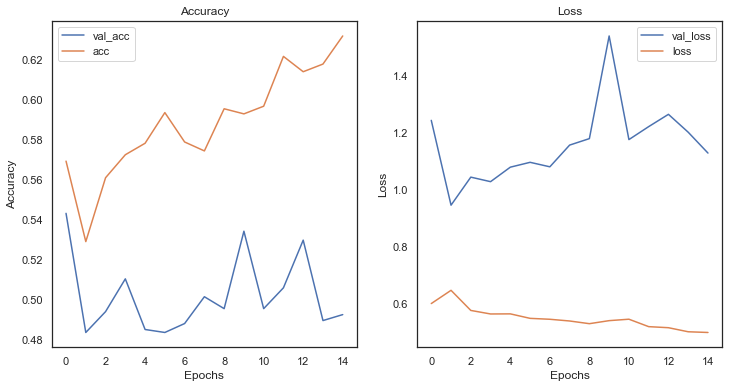

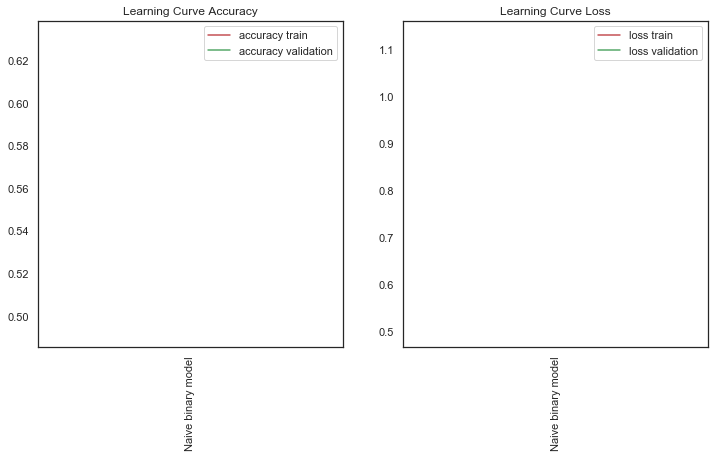

Name  accuracy train  accuracy validation  loss train  \
0  Naive binary model         0.63178              0.49256     0.49786   

   loss validation  
0          1.12972

In [192]:
df=model_results(history, 'Naive binary model', df)
df

### Improving the model:

Redefining `create_model` for the binary case.

In [193]:
def create_model_bin(input_shape=(64, 64, 3), activation='relu', 
                 loss='binary_crossentropy', 
                optimizer='rmsprop',metrics=['acc'] , 
                 neur1=10, neur2=20, pool=(2,2)):
 # create model
    model = models.Sequential()
    model.add(layers.Conv2D(neur1, (3, 3), activation=activation,
                        input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool))
    
    model.add(layers.Conv2D(neur1, (4, 4), activation=activation))
    model.add(layers.MaxPooling2D(pool))

    model.add(layers.Conv2D(neur2, (3, 3), activation=activation))
    model.add(layers.MaxPooling2D(pool))

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation=activation))
    model.add(layers.Dense(2, activation=activation))

# Compile model
    model.compile(loss=loss,
              optimizer=optimizer,
              metrics=metrics)
    return model

In [194]:
model_bina=create_model_bin()

In [195]:
hist_bin1=fit_model(model_bina, train_img64, train_y , val_split=0.3, verbose=1 )

Epoch 1/15
105/105 [==============================] - 5s 41ms/step - loss: 0.7629 - acc: 0.5112 - val_loss: 0.7010 - val_acc: 0.4926
Epoch 2/15
105/105 [==============================] - 5s 46ms/step - loss: 0.7398 - acc: 0.5054 - val_loss: 0.7314 - val_acc: 0.5179
Epoch 3/15
105/105 [==============================] - 4s 35ms/step - loss: 0.7034 - acc: 0.5010 - val_loss: 0.6936 - val_acc: 0.5104
Epoch 4/15
105/105 [==============================] - 5s 47ms/step - loss: 0.6764 - acc: 0.5112 - val_loss: 0.7106 - val_acc: 0.5119
Epoch 5/15
105/105 [==============================] - 5s 52ms/step - loss: 0.6813 - acc: 0.5061 - val_loss: 0.7182 - val_acc: 0.5595
Epoch 6/15
105/105 [==============================] - 4s 37ms/step - loss: 0.6645 - acc: 0.4997 - val_loss: 0.7002 - val_acc: 0.5089
Epoch 7/15
105/105 [==============================] - 4s 35ms/step - loss: 0.7108 - acc: 0.5227 - val_loss: 0.6866 - val_acc: 0.4777
Epoch 8/15
105/105 [==============================] - 4s 39ms/step - 

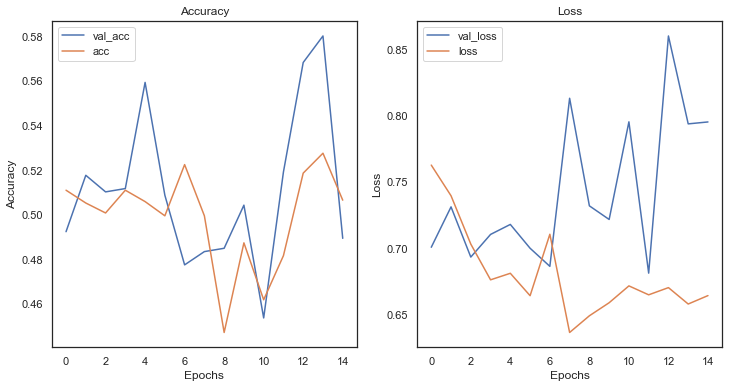

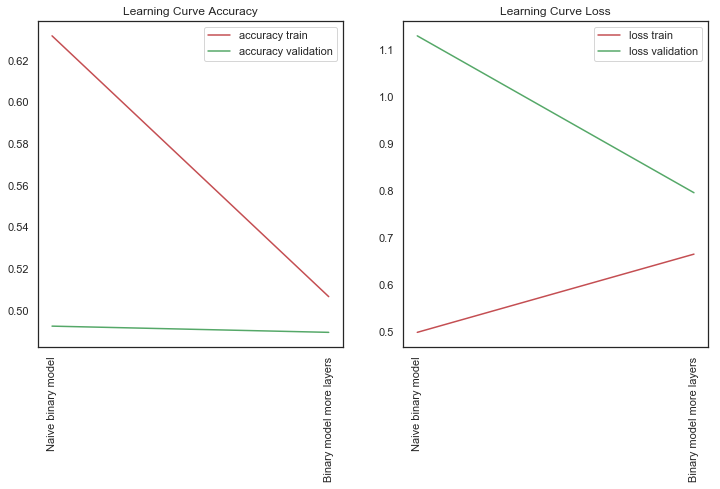

Name  accuracy train  accuracy validation  loss train  \
0        Naive binary model         0.63178              0.49256     0.49786   
0  Binary model more layers         0.50670              0.48958     0.66454   

   loss validation  
0          1.12972  
0          0.79541

In [196]:
df=model_results(hist_bin1, 'Binary model more layers', df)
df

Increase number of epochs:

In [197]:
hist_bin2=fit_model(model_bina, train_img64, train_y , val_split=0.3, verbose=1 , epo=50)

Epoch 1/50
105/105 [==============================] - 4s 36ms/step - loss: 0.6511 - acc: 0.5022 - val_loss: 0.7721 - val_acc: 0.5818
Epoch 2/50
105/105 [==============================] - 4s 34ms/step - loss: 0.6922 - acc: 0.4818 - val_loss: 0.7976 - val_acc: 0.4643
Epoch 3/50
105/105 [==============================] - 3s 33ms/step - loss: 0.6944 - acc: 0.4027 - val_loss: 0.8357 - val_acc: 0.4628
Epoch 4/50
105/105 [==============================] - 4s 35ms/step - loss: 0.6534 - acc: 0.4665 - val_loss: 0.7978 - val_acc: 0.4673
Epoch 5/50
105/105 [==============================] - 4s 34ms/step - loss: 0.6670 - acc: 0.5041 - val_loss: 0.7591 - val_acc: 0.5253
Epoch 6/50
105/105 [==============================] - 4s 42ms/step - loss: 0.6413 - acc: 0.5137 - val_loss: 0.8993 - val_acc: 0.4167
Epoch 7/50
105/105 [==============================] - 4s 35ms/step - loss: 0.6328 - acc: 0.4952 - val_loss: 0.7080 - val_acc: 0.5402
Epoch 8/50
105/105 [==============================] - 4s 35ms/step - 

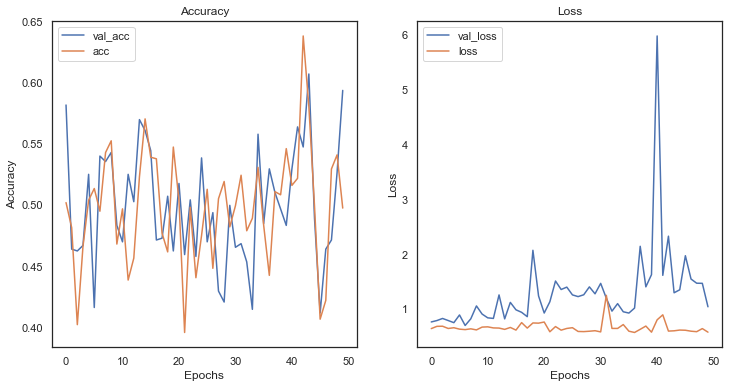

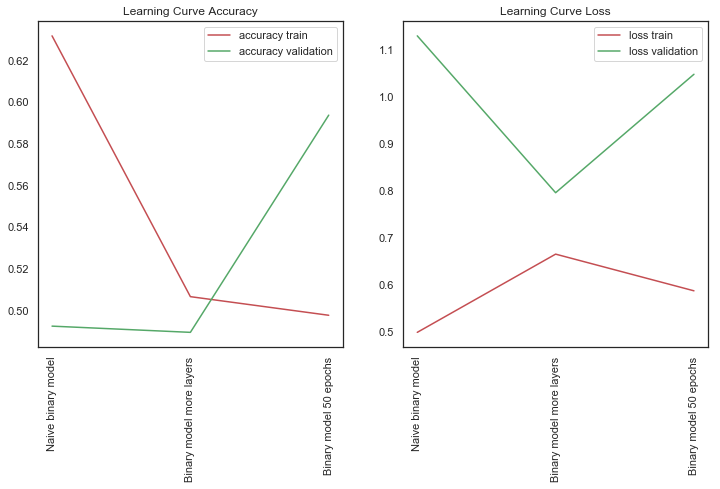

Name  accuracy train  accuracy validation  loss train  \
0        Naive binary model         0.63178              0.49256     0.49786   
0  Binary model more layers         0.50670              0.48958     0.66454   
0    Binary model 50 epochs         0.49777              0.59375     0.58637   

   loss validation  
0          1.12972  
0          0.79541  
0          1.04784

In [198]:
df=model_results(hist_bin2, 'Binary model 50 epochs', df)
df

In [199]:
hist_bin3=fit_model(model_bina, train_img64, train_y , val_split=0.3, verbose=1 , epo=100)

Epoch 1/100
105/105 [==============================] - 3s 33ms/step - loss: 0.5703 - acc: 0.5552 - val_loss: 1.0914 - val_acc: 0.4851
Epoch 2/100
105/105 [==============================] - 3s 33ms/step - loss: 0.6973 - acc: 0.4110 - val_loss: 1.6152 - val_acc: 0.4256
Epoch 3/100
105/105 [==============================] - 3s 33ms/step - loss: 0.5981 - acc: 0.4952 - val_loss: 1.4295 - val_acc: 0.4568
Epoch 4/100
105/105 [==============================] - 4s 33ms/step - loss: 0.5474 - acc: 0.4710 - val_loss: 1.4629 - val_acc: 0.4896
Epoch 5/100
105/105 [==============================] - 4s 35ms/step - loss: 0.5561 - acc: 0.4633 - val_loss: 1.6213 - val_acc: 0.4554
Epoch 6/100
105/105 [==============================] - 4s 33ms/step - loss: 0.7091 - acc: 0.4627 - val_loss: 1.8214 - val_acc: 0.5253
Epoch 7/100
105/105 [==============================] - 5s 44ms/step - loss: 0.7433 - acc: 0.4480 - val_loss: 1.9829 - val_acc: 0.4807
Epoch 8/100
105/105 [==============================] - 4s 34ms

Epoch 62/100
105/105 [==============================] - 4s 37ms/step - loss: 0.5844 - acc: 0.5303 - val_loss: 3.1668 - val_acc: 0.4940
Epoch 63/100
105/105 [==============================] - 4s 38ms/step - loss: 0.4582 - acc: 0.5558 - val_loss: 2.6679 - val_acc: 0.4390
Epoch 64/100
105/105 [==============================] - 4s 38ms/step - loss: 0.5107 - acc: 0.5660 - val_loss: 2.8415 - val_acc: 0.5357
Epoch 65/100
105/105 [==============================] - 4s 40ms/step - loss: 0.8307 - acc: 0.6337 - val_loss: 3.0813 - val_acc: 0.5670
Epoch 66/100
105/105 [==============================] - 5s 51ms/step - loss: 0.6092 - acc: 0.6688 - val_loss: 3.4151 - val_acc: 0.5268
Epoch 67/100
105/105 [==============================] - 6s 57ms/step - loss: 0.5842 - acc: 0.5750 - val_loss: 2.9054 - val_acc: 0.5193
Epoch 68/100
105/105 [==============================] - 5s 42ms/step - loss: 0.8185 - acc: 0.6426 - val_loss: 3.4839 - val_acc: 0.5491
Epoch 69/100
105/105 [==============================] -

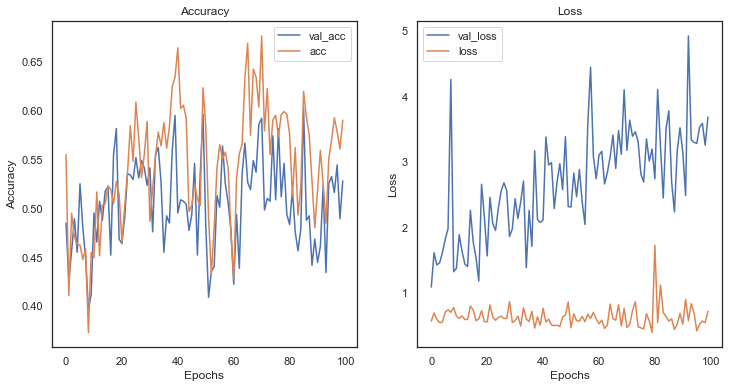

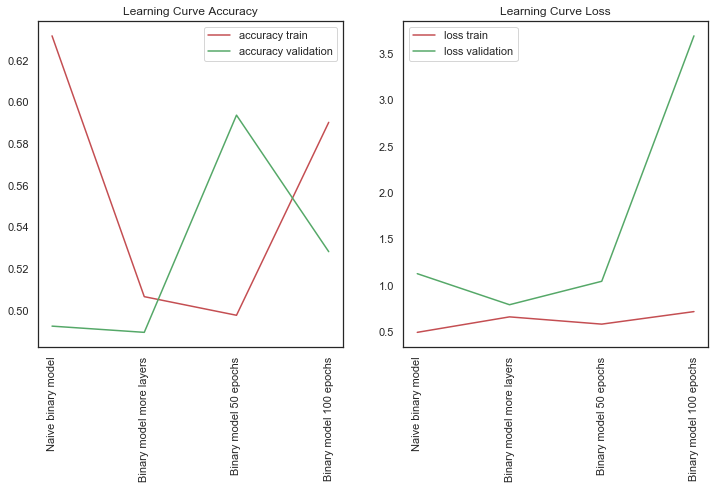

Name  accuracy train  accuracy validation  loss train  \
0        Naive binary model         0.63178              0.49256     0.49786   
0  Binary model more layers         0.50670              0.48958     0.66454   
0    Binary model 50 epochs         0.49777              0.59375     0.58637   
0   Binary model 100 epochs         0.59030              0.52827     0.72132   

   loss validation  
0          1.12972  
0          0.79541  
0          1.04784  
0          3.69088

In [200]:
df=model_results(hist_bin3, 'Binary model 100 epochs', df)
df

In [201]:
hist_bin4=fit_model(model_bina, train_img64, train_y , 
                    val_split=0.3, verbose=1 , epo=100, batch=50)

Epoch 1/100
32/32 [==============================] - 4s 117ms/step - loss: 0.8905 - acc: 0.5680 - val_loss: 3.0003 - val_acc: 0.4911
Epoch 2/100
32/32 [==============================] - 4s 136ms/step - loss: 0.6109 - acc: 0.5814 - val_loss: 2.8057 - val_acc: 0.5729
Epoch 3/100
32/32 [==============================] - 3s 103ms/step - loss: 0.3356 - acc: 0.6496 - val_loss: 3.6263 - val_acc: 0.5312
Epoch 4/100
32/32 [==============================] - 4s 126ms/step - loss: 0.3639 - acc: 0.6146 - val_loss: 4.0186 - val_acc: 0.5104
Epoch 5/100
32/32 [==============================] - 3s 109ms/step - loss: 0.6974 - acc: 0.6088 - val_loss: 3.5768 - val_acc: 0.4762
Epoch 6/100
32/32 [==============================] - 3s 105ms/step - loss: 0.6628 - acc: 0.5807 - val_loss: 3.1085 - val_acc: 0.4583
Epoch 7/100
32/32 [==============================] - 3s 105ms/step - loss: 0.4681 - acc: 0.5692 - val_loss: 3.5317 - val_acc: 0.4970
Epoch 8/100
32/32 [==============================] - 3s 103ms/step - 

32/32 [==============================] - 3s 102ms/step - loss: 0.3229 - acc: 0.5795 - val_loss: 4.1471 - val_acc: 0.5060
Epoch 63/100
32/32 [==============================] - 3s 102ms/step - loss: 0.3107 - acc: 0.6496 - val_loss: 3.9442 - val_acc: 0.5164
Epoch 64/100
32/32 [==============================] - 3s 101ms/step - loss: 0.2665 - acc: 0.5475 - val_loss: 4.0553 - val_acc: 0.4970
Epoch 65/100
32/32 [==============================] - 3s 100ms/step - loss: 0.3535 - acc: 0.6005 - val_loss: 3.9616 - val_acc: 0.4985
Epoch 66/100
32/32 [==============================] - 3s 102ms/step - loss: 0.3399 - acc: 0.5954 - val_loss: 4.1300 - val_acc: 0.5000
Epoch 67/100
32/32 [==============================] - 3s 100ms/step - loss: 0.2440 - acc: 0.5686 - val_loss: 4.1054 - val_acc: 0.4851
Epoch 68/100
32/32 [==============================] - 3s 103ms/step - loss: 0.2639 - acc: 0.6011 - val_loss: 4.1095 - val_acc: 0.5119
Epoch 69/100
32/32 [==============================] - 3s 100ms/step - loss:

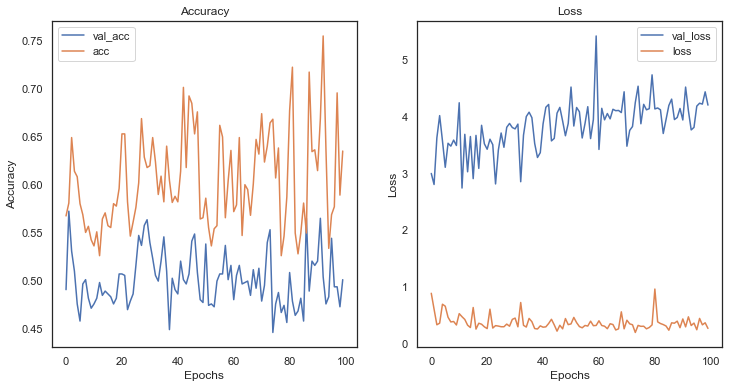

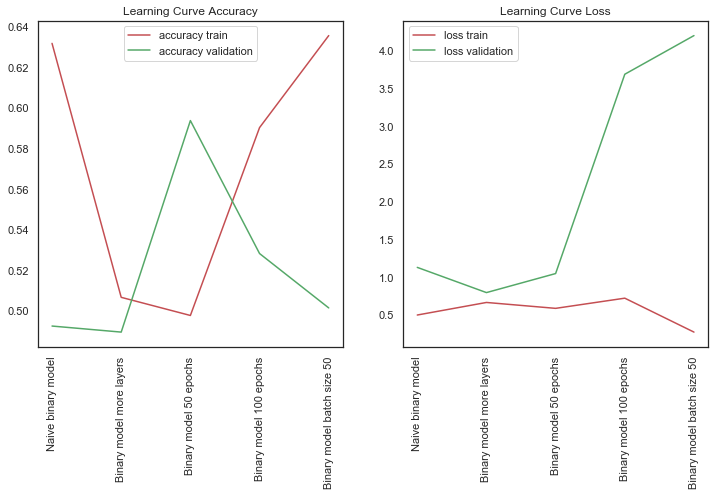

Name  accuracy train  accuracy validation  \
0          Naive binary model         0.63178              0.49256   
0    Binary model more layers         0.50670              0.48958   
0      Binary model 50 epochs         0.49777              0.59375   
0     Binary model 100 epochs         0.59030              0.52827   
0  Binary model batch size 50         0.63561              0.50149   

   loss train  loss validation  
0     0.49786          1.12972  
0     0.66454          0.79541  
0     0.58637          1.04784  
0     0.72132          3.69088  
0     0.27148          4.20341

In [202]:
df=model_results(hist_bin4, 'Binary model batch size 50', df)
df

In [203]:
hist_bin5=fit_model(model_bina, train_img64, train_y , 
                    val_split=0.3, verbose=1 , epo=100, batch=100)

Epoch 1/100
16/16 [==============================] - 3s 214ms/step - loss: 0.2335 - acc: 0.6356 - val_loss: 4.0471 - val_acc: 0.5238
Epoch 2/100
16/16 [==============================] - 3s 213ms/step - loss: 0.2565 - acc: 0.6599 - val_loss: 4.1936 - val_acc: 0.5089
Epoch 3/100
16/16 [==============================] - 4s 222ms/step - loss: 0.2647 - acc: 0.5935 - val_loss: 3.9768 - val_acc: 0.5685
Epoch 4/100
16/16 [==============================] - 3s 208ms/step - loss: 0.2182 - acc: 0.6930 - val_loss: 4.3345 - val_acc: 0.5625
Epoch 5/100
16/16 [==============================] - 3s 203ms/step - loss: 0.2814 - acc: 0.6994 - val_loss: 4.0909 - val_acc: 0.4940
Epoch 6/100
16/16 [==============================] - 3s 210ms/step - loss: 0.2821 - acc: 0.6707 - val_loss: 4.1431 - val_acc: 0.5179
Epoch 7/100
16/16 [==============================] - 3s 207ms/step - loss: 0.2039 - acc: 0.6382 - val_loss: 4.2146 - val_acc: 0.5179
Epoch 8/100
16/16 [==============================] - 3s 200ms/step - 

16/16 [==============================] - 3s 204ms/step - loss: 0.3106 - acc: 0.5731 - val_loss: 4.1830 - val_acc: 0.4747
Epoch 63/100
16/16 [==============================] - 3s 199ms/step - loss: 0.1810 - acc: 0.5763 - val_loss: 4.5799 - val_acc: 0.4539
Epoch 64/100
16/16 [==============================] - 3s 220ms/step - loss: 0.2823 - acc: 0.5444 - val_loss: 4.2192 - val_acc: 0.5402
Epoch 65/100
16/16 [==============================] - 3s 213ms/step - loss: 0.6089 - acc: 0.6146 - val_loss: 4.1866 - val_acc: 0.4896
Epoch 66/100
16/16 [==============================] - 3s 199ms/step - loss: 0.3285 - acc: 0.5507 - val_loss: 3.8764 - val_acc: 0.4836
Epoch 67/100
16/16 [==============================] - 3s 208ms/step - loss: 0.2978 - acc: 0.5820 - val_loss: 3.9120 - val_acc: 0.5030
Epoch 68/100
16/16 [==============================] - 4s 226ms/step - loss: 0.1988 - acc: 0.6407 - val_loss: 4.3190 - val_acc: 0.5848
Epoch 69/100
16/16 [==============================] - 3s 196ms/step - loss:

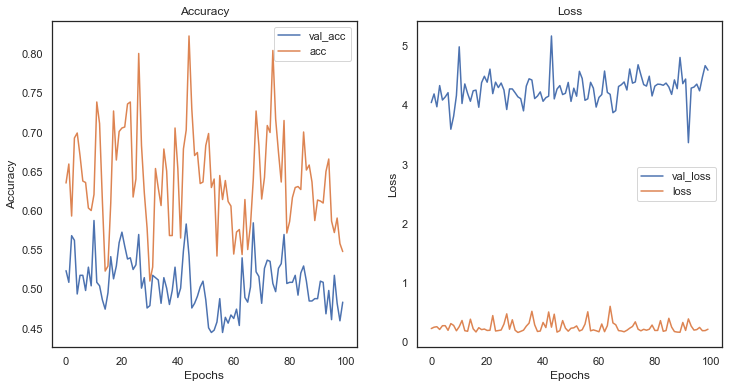

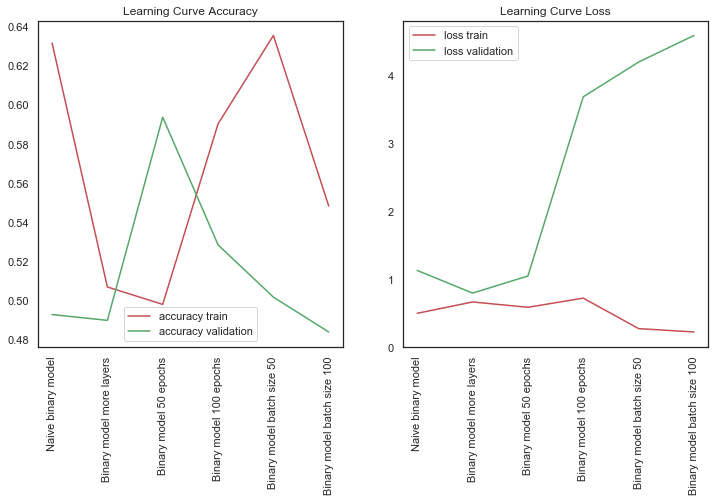

Name  accuracy train  accuracy validation  \
0           Naive binary model         0.63178              0.49256   
0     Binary model more layers         0.50670              0.48958   
0       Binary model 50 epochs         0.49777              0.59375   
0      Binary model 100 epochs         0.59030              0.52827   
0   Binary model batch size 50         0.63561              0.50149   
0  Binary model batch size 100         0.54818              0.48363   

   loss train  loss validation  
0     0.49786          1.12972  
0     0.66454          0.79541  
0     0.58637          1.04784  
0     0.72132          3.69088  
0     0.27148          4.20341  
0     0.22213          4.59535

In [204]:
df=model_results(hist_bin5, 'Binary model batch size 100', df)
df

In [ ]:
# Create function to extract recall

In [ ]:
y_hat_train=model.predict(train_img)
y_hat_test=model.predict(test_img)

Clearly here I have to round to get the actual prediction for the class.

In [ ]:
pr_train=precision_score(train_labels, train_labels, average=None)
#rec_train=recall_score(train_labels, y_hat_train)
#acc_train=accuracy_score(train_labels, y_hat_train)
#f1_train=f1_score(train_labels, y_hat_train)

#pr_test=precision_score(test_labels, y_hat_test)
#rec_test=recall_score(test_labels, y_hat_test)
#acc_test=accuracy_score(test_labels, y_hat_test)
#f1_test=f1_score(test_labels, y_hat_test)
pr_train
#print("Train: \nprecision", pr_train,"\nrecall:", rec_train, '\naccuracy:', acc_train, '\nf1 score:', f1_train,'\n')
#print("Test: \nprecision", pr_test,"\nrecall:", rec_test, '\naccuracy:', acc_test, '\nf1 score:', f1_test)

In [ ]:
# Create function to compare the models (similar to previous one but comparing recall)

### Re tuning of the parameters
With this time binary classification problem

In [ ]:
# Grid Searches

In [ ]:
# Tuning with normalization and regularization

In [ ]:
# Best model

In [ ]:
# Testing on the test set

## LIME